# House Prices - Advanced Regression Techniques

## Problem statement

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you **to predict the final price of each home.**

## Data

link to Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

## Project Content

1) Exploratory Data Analysis
    
    a) Data types of the variables
    
    b) Missing Values
    
    c) Outliers
    
    d) Correlations
    
    e) Relationships between dependent and independent variables

2) Data Preprocessing

    a) Dummy Variables
    
    b) Splitting on dependent and independent variables
    
    c) Splitting on the train and test sets
    
    e) Scaling the data
    
3) Baseline models

4) HyperParameter Tuning and Optimization

5) Test predictions

6) Feature Importance

7) Visualization

8) Conclusion

In [70]:
#importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis

In [404]:
#importing the dataset
df = pd.read_csv("/Users/polyanaboss/Downloads/house_prices_kaggle/train.csv")

In [457]:
#checking the shape of each set
print(f"The train shape: {df.shape}")

The train shape: (1460, 80)


In [73]:
#checking the first raws of the data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data types of the variables

One step before starting the analysis is to check the data types of each variable in the dataset

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In total, there are 80 columns of 3 data types: float, integer and object. Furthermore, there are a lot of missing values to be treated.

### Missing Values

In the output above it is seen that there is a column of every type with missing values. Hence, we are unable to treat them equally and simultaneously. We will divide them into 2 or 3 categories.

In [78]:
# defining the list of categorical data
categorical_features = [feature for feature in df.columns if df[feature].dtypes=='O' and df[feature].isnull().sum() > 0]
print(len(categorical_features))

16


In [104]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes=='int64' or df[feature].dtypes=='float64']
numerical_features = [feature for feature in numerical_features if df[feature].isnull().sum() > 0]
print(len(numerical_features))

3


In [105]:
print(f"Total number of columns with missing values: {len(numerical_features) + len(categorical_features)}")
print("\n")
print(f"In percentages: {(len(numerical_features) + len(categorical_features))/df.shape[1]}")

Total number of columns with missing values: 19


In percentages: 0.2375


The last output illustrates that 23.75% of columns have at least 1 NA. We will start with categorical features.

In [81]:
for feature in categorical_features:
    total = df[feature].isnull().sum()
    percent = df[feature].isnull().mean()
    
    print(f"{feature}: {total} missing values or {percent} of total number of observations")

Alley: 1369 missing values or 0.9376712328767123 of total number of observations
MasVnrType: 8 missing values or 0.005479452054794521 of total number of observations
BsmtQual: 37 missing values or 0.025342465753424658 of total number of observations
BsmtCond: 37 missing values or 0.025342465753424658 of total number of observations
BsmtExposure: 38 missing values or 0.026027397260273973 of total number of observations
BsmtFinType1: 37 missing values or 0.025342465753424658 of total number of observations
BsmtFinType2: 38 missing values or 0.026027397260273973 of total number of observations
Electrical: 1 missing values or 0.0006849315068493151 of total number of observations
FireplaceQu: 690 missing values or 0.4726027397260274 of total number of observations
GarageType: 81 missing values or 0.05547945205479452 of total number of observations
GarageFinish: 81 missing values or 0.05547945205479452 of total number of observations
GarageQual: 81 missing values or 0.05547945205479452 of to

It is possible to divide these results into 2 groups: 

1) Missing values cover sufficiently large part of the distribution(say, more than 40%)

2) Missing values cover less than 40% of the distribution

It make sense to create such kind of separation due to the different techniques required to treat those values.

### Missing Values in Categorical Data

In [82]:
#starting the the first group
categorical_more_than_40 = [feature for feature in categorical_features if df[feature].isnull().mean() > 0.4]

Since missing values are extremely large part of total observations, we cannot simply impute them because then the data will not be relevant and actual. Instead, we can catch the possible importance of missingness in those variables.

In [83]:
#importing the Missing Indicator
from sklearn.impute import MissingIndicator

In [84]:
missing_indicator = MissingIndicator()

In [85]:
#now new variables with _imputed wil be created with missing indicator and the old columns will be dropped
for feature in categorical_more_than_40:
    df[feature + "_imputed"] = missing_indicator.fit_transform(np.array(df[feature]).reshape(-1, 1))
    df.drop(feature, axis = 1, inplace = True)

What we have done is creating the new variables that are equal to True if the observed value is NAN and 0 otherwise. Furthermore, we dropped the old versions of the variable.

In [86]:
#creating the list of columns for the second group where there is a small number of missing values.
categorical_small = [feature for feature in categorical_features if feature not in categorical_more_than_40]

In [87]:
#observing the variables
for feature in categorical_small:
    print(df[feature].value_counts())
    print(f"Missing values: {df[feature].isnull().sum()}")
    print(f"Missing values in %: {df[feature].isnull().mean()*100}")
    print("\n")

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
Missing values: 8
Missing values in %: 0.547945205479452


TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
Missing values: 37
Missing values in %: 2.5342465753424657


TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
Missing values: 37
Missing values in %: 2.5342465753424657


No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Missing values: 38
Missing values in %: 2.6027397260273974


Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Missing values: 37
Missing values in %: 2.5342465753424657


Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
Missing values: 38
Missing values in %: 2.6027397260273974


SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
Missing values: 1
Missing

The majority of columns here does have the imbalanced distribution of values. It means that 1 class dominates over another ones. In such cases, we can substitute missings with the most frequent values, taking into consideration the fact that the percentage of missings is quite low(0-5%). However, there is 1 column here that should be considered separately: **GarageFinish**. It is pretty balanced with 3 classes and 81 missings. In my opinion, it will be better to spread missing values equally across the classes.

In [88]:
#creating a new column-copy 
df["GarageFinish_imputed"] = df["GarageFinish"]
#instantiate the random sample of length = number of missings in the variable
random_sample_garage = df["GarageFinish"].dropna().sample(df["GarageFinish"].isnull().sum())
#assigning appropriate indices
random_sample_garage.index=df[df["GarageFinish"].isnull()].index
#filling the missings
df.loc[df["GarageFinish"].isnull(),"GarageFinish"+'_imputed'] = random_sample_garage
#checking the correctness 
df["GarageFinish_imputed"].isnull().sum()

0

In [89]:
#dropping the old variable
df.drop("GarageFinish", axis = 1, inplace = True)

Now we can switch to the rest columns the list

In [90]:
categorical_small = [feature for feature in categorical_features if feature not in categorical_more_than_40]
categorical_small = [feature for feature in categorical_small if feature != "GarageFinish"]
categorical_small

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageQual',
 'GarageCond']

In [91]:
#importing the simple imputer object 
from sklearn.impute import SimpleImputer

In [92]:
#initializing the imputer
simple_imputer = SimpleImputer(strategy = "most_frequent") #setting the strategy for categorical values

In [93]:
for feature in categorical_small:
    df[feature + "_imputed"] = simple_imputer.fit_transform(np.array(df[feature]).reshape(-1, 1))
    df.drop(feature, axis = 1, inplace = True)

In [95]:
#controlling the correct actions, no extra columns are present
len(df.columns)

80

In [101]:
#finally, let us check whether there are any categorical variables with missings or not
[feature for feature in df.columns if df[feature].dtypes == "O" and df[feature].isnull().sum() > 0]

[]

We have successfully treated all missings for all categorical values. Now we can proceed with the numerical ones.

### Missing Values in Numerical Data

In [106]:
#finding the percentage of missing values in each numeric variable
for feature in numerical_features:
    total = df[feature].isnull().sum()
    percent = df[feature].isnull().mean()
    
    print(f"{feature}: {total} missing values or {percent} of total number of observations")

LotFrontage: 259 missing values or 0.1773972602739726 of total number of observations
MasVnrArea: 8 missing values or 0.005479452054794521 of total number of observations
GarageYrBlt: 81 missing values or 0.05547945205479452 of total number of observations


Before making any decisions concerning the imputation method, we will draw the histograms.

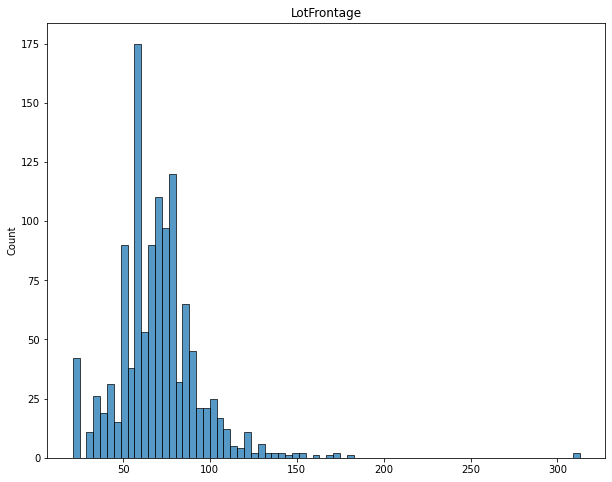

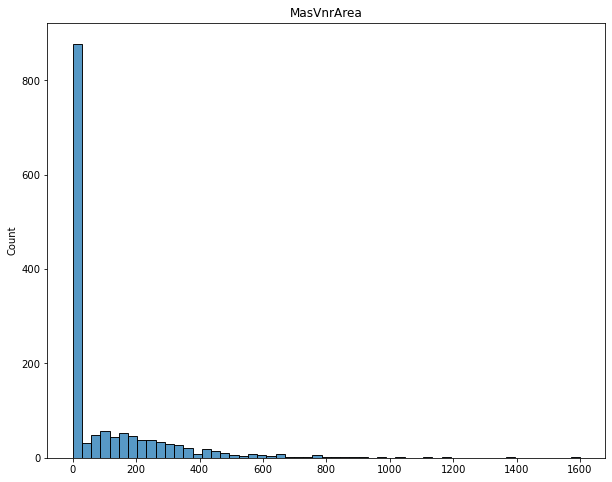

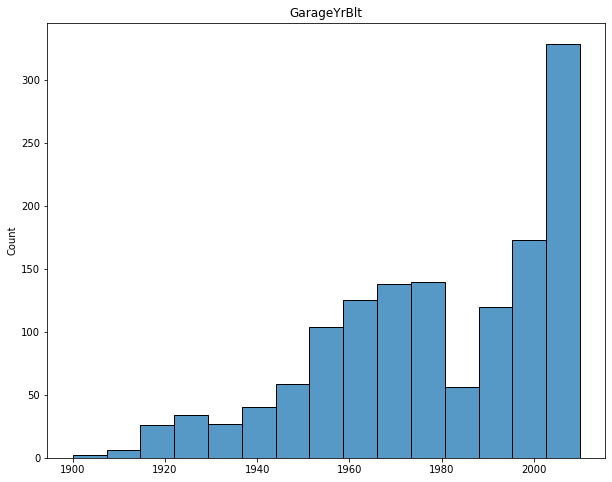

In [112]:
for feature in numerical_features:   
    plt.figure(figsize = (10,8))
    sns.histplot(df[feature])
    plt.title(feature)
    plt.xlabel(None)

The first 2 variables are likely to be lognormally distributed. The last histogram looks strange, however, it is due to the nature of the variable - it is date/time column with information about the years. 

In [120]:
#for the year variable, i will use fillna command
df["GarageYrBlt"].fillna(value=None, method='backfill', inplace = True)

In [124]:
#for the rest variables i will substitute missings with the median due to the extremely rightly skewed distributions
simple_imputer_median = SimpleImputer(strategy = "median")
for feature in numerical_features[:2]:
    df[feature + "_imputed"] = simple_imputer_median.fit_transform(np.array(df[feature]).reshape(-1, 1))
    df.drop(feature, axis = 1, inplace = True)

In [127]:
#again, checking for any missings in the data
(df.isnull().sum()>0).sum()

0

All missing values are treated successfully, now we can move on to the next part of preprocessing, which is dedicated to the outliers detection.

## Outliers

In this section, we will be detecting the outliers, e.g. extreme values. The numeric variables will be divided into 3 groups: years, discrete and continious. Since only the last type can have outliers here.

In [130]:
#creating the list with all non-categorical variables
numerical_features_full = [feature for feature in df.columns if df[feature].dtypes != "O"]

In [146]:
#variables showing the years
year_variables = [feature for feature in df.columns if "Year" in feature or "Yr" in feature]

In [153]:
#filtering the numeric variables that are not year_variables and have more than 10 unique values
continious_features = [feature for feature in numerical_features_full if len(df[feature].unique())>10 and 
                       feature not in year_variables]

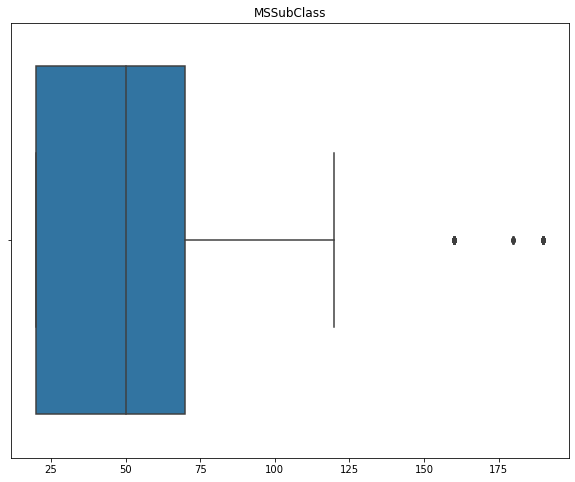

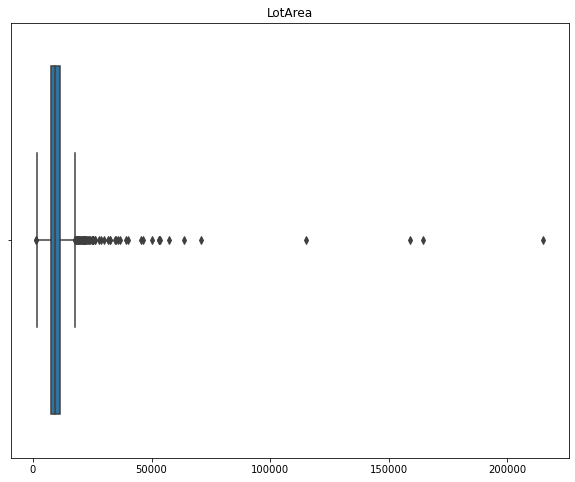

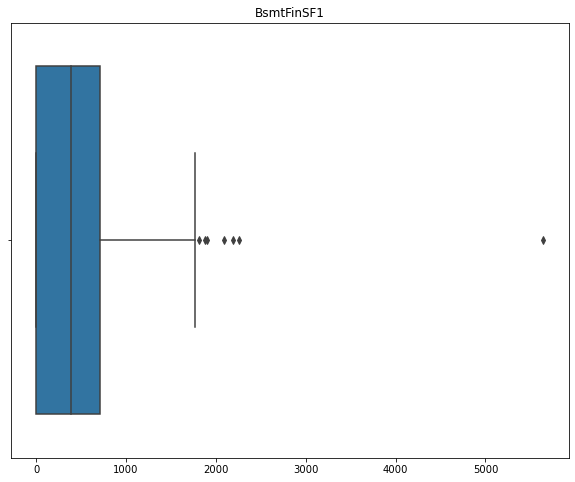

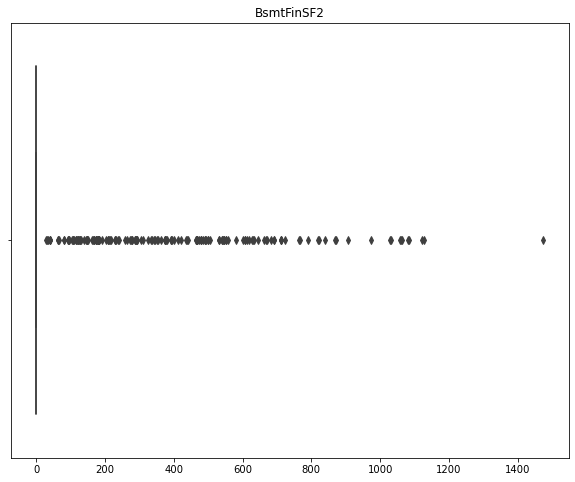

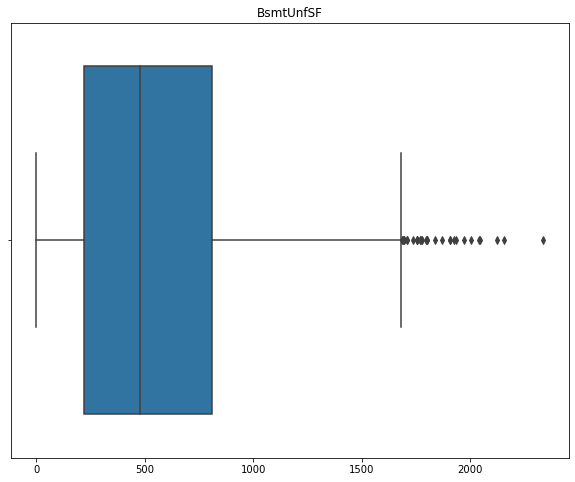

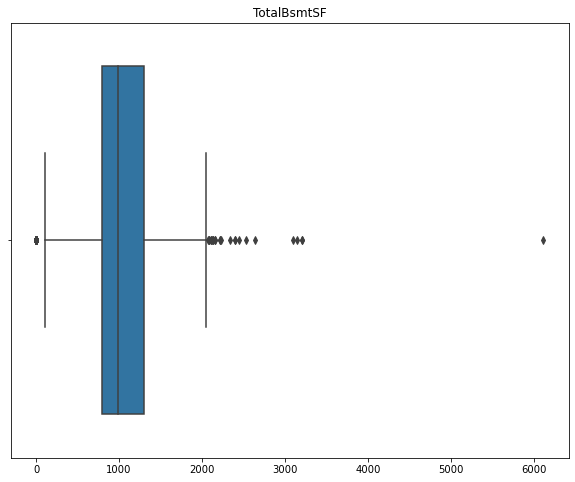

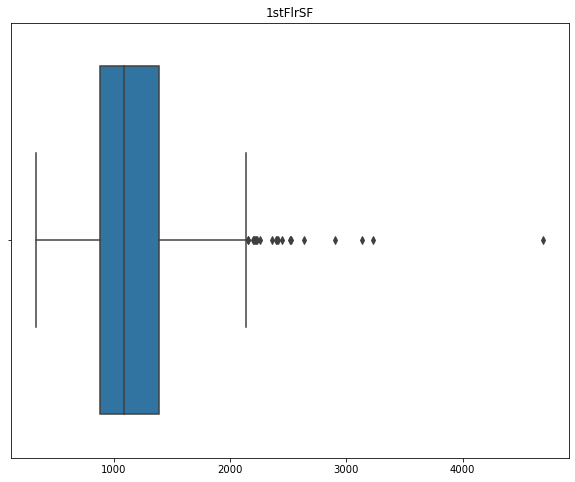

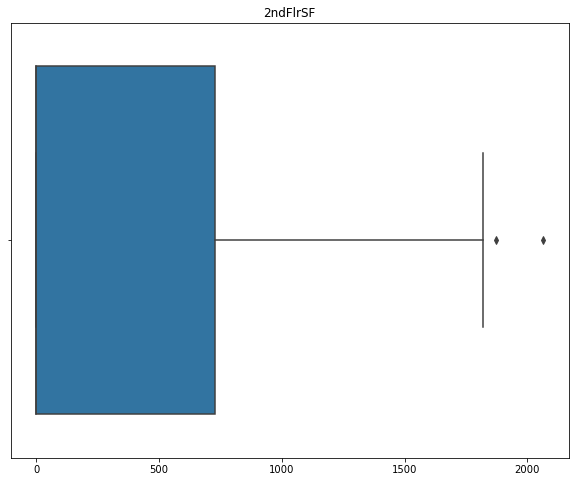

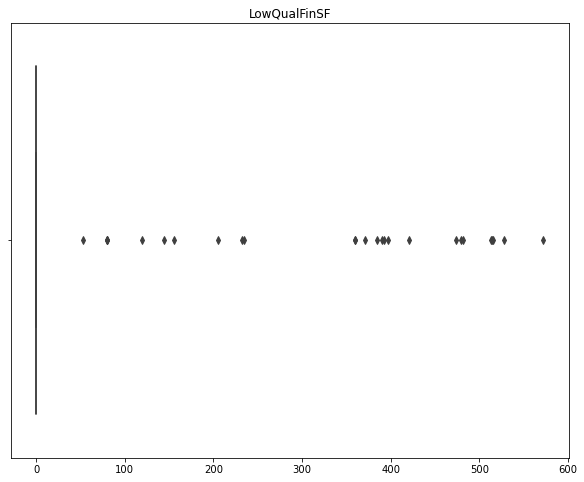

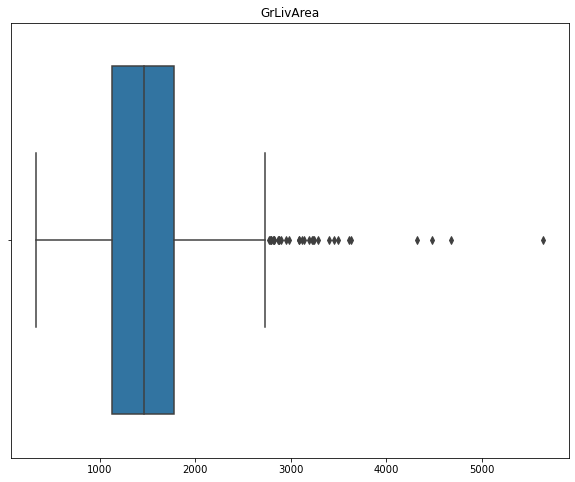

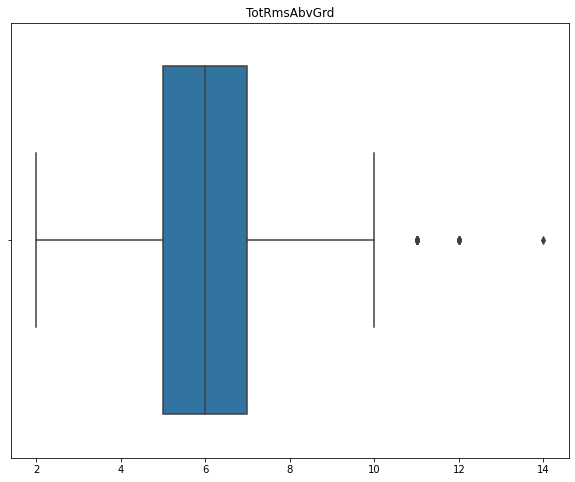

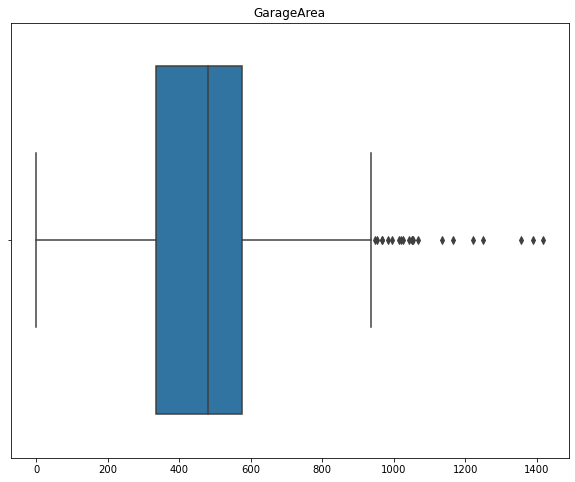

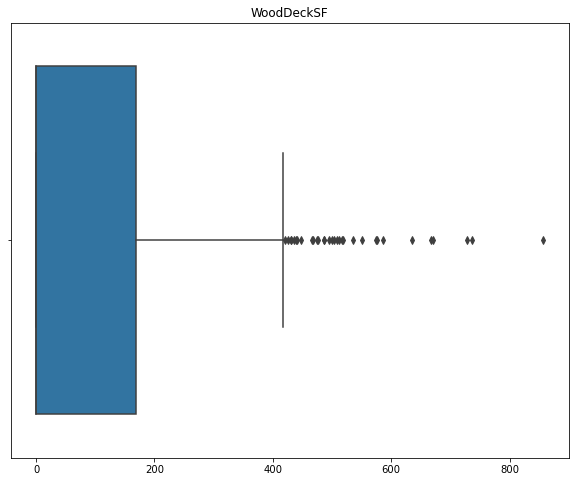

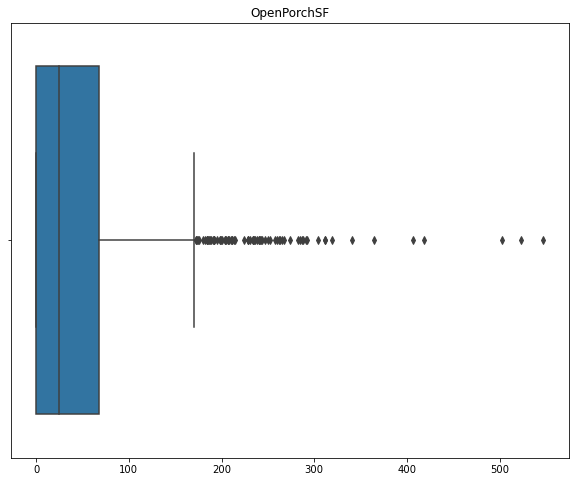

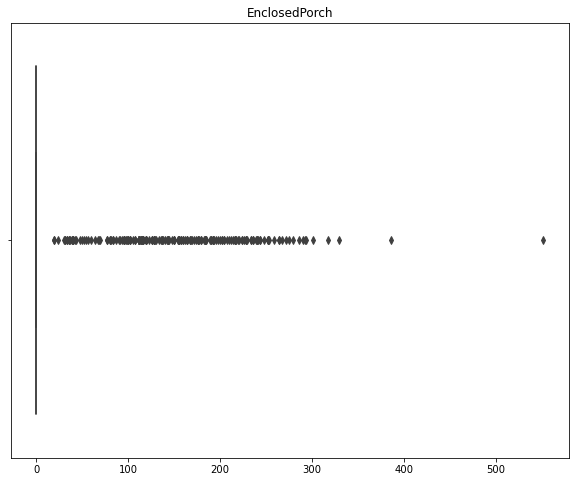

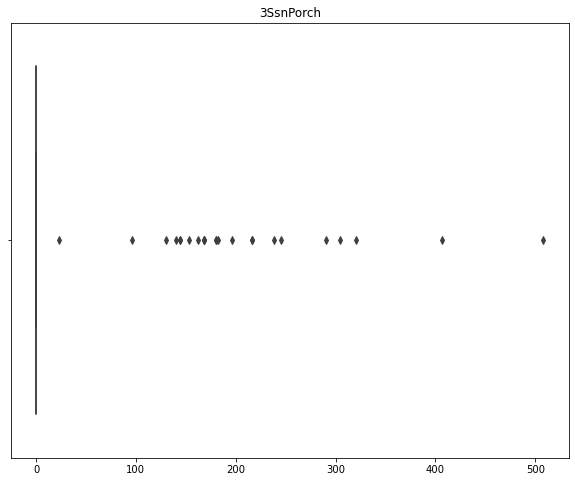

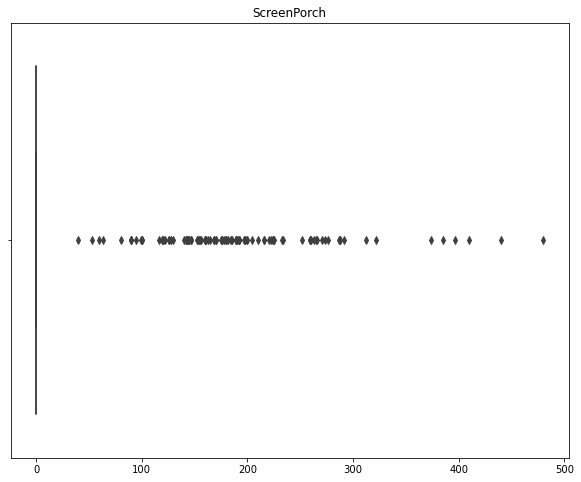

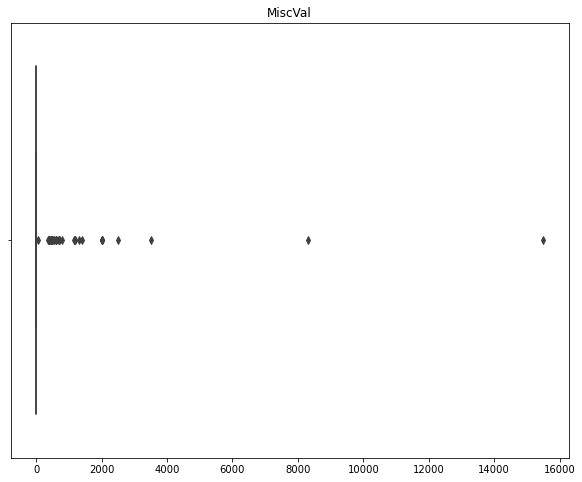

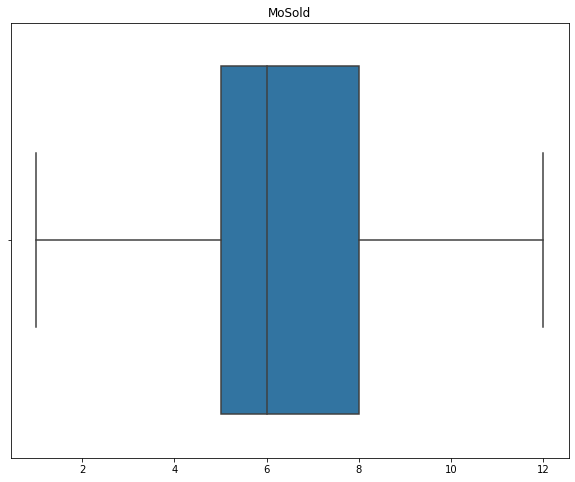

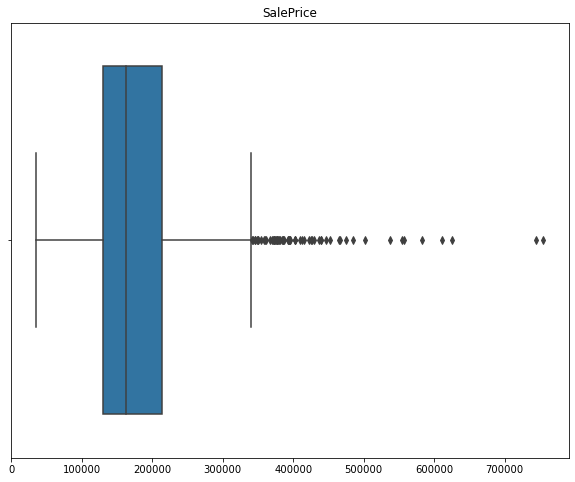

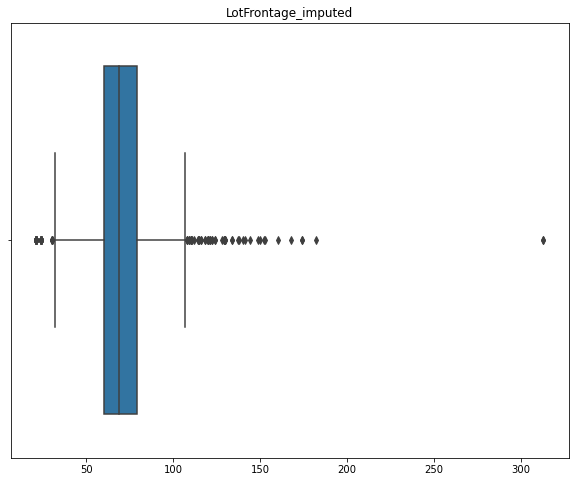

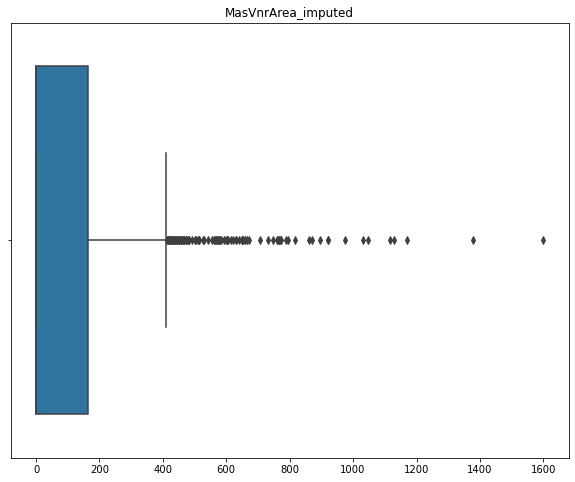

In [155]:
for feature in continious_features:   
    plt.figure(figsize = (10,8))
    sns.boxplot(x = df[feature])
    plt.title(feature)
    plt.xlabel(None)

In fact, the majority of variables described above are having at least 1 extreme value. Before choosing the method to treat them, we will look at the histograms.

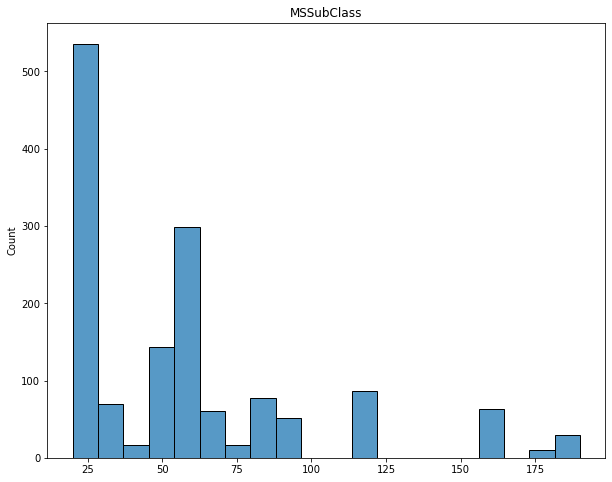

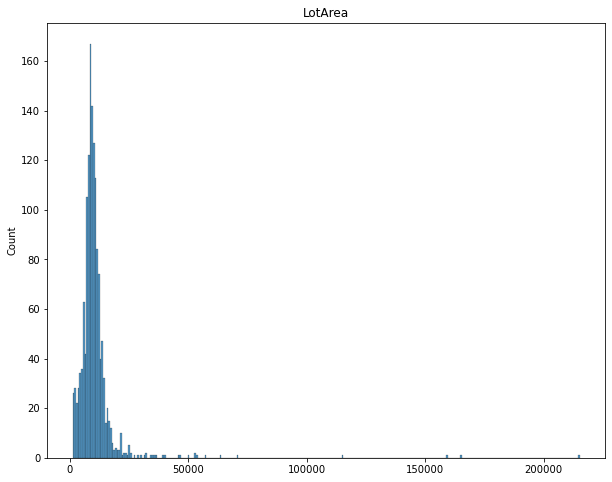

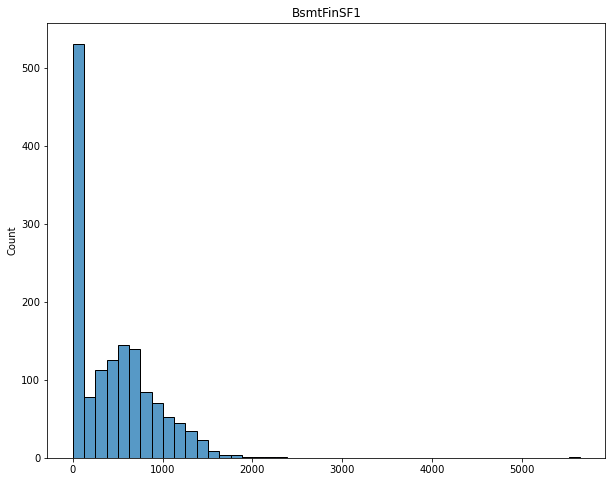

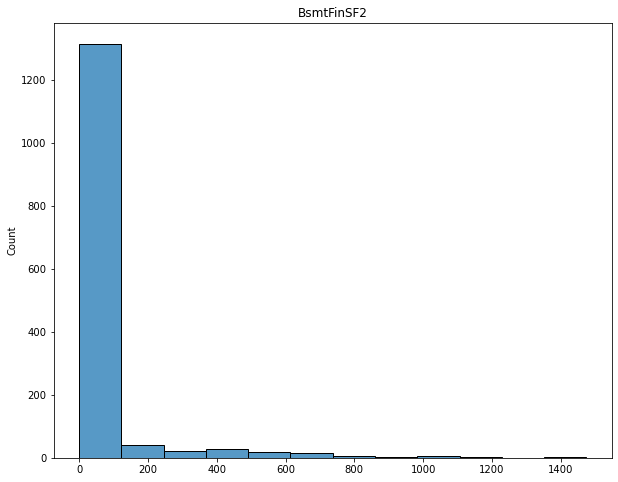

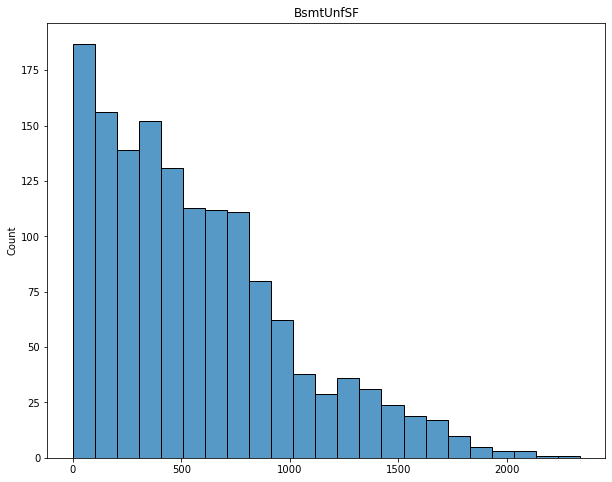

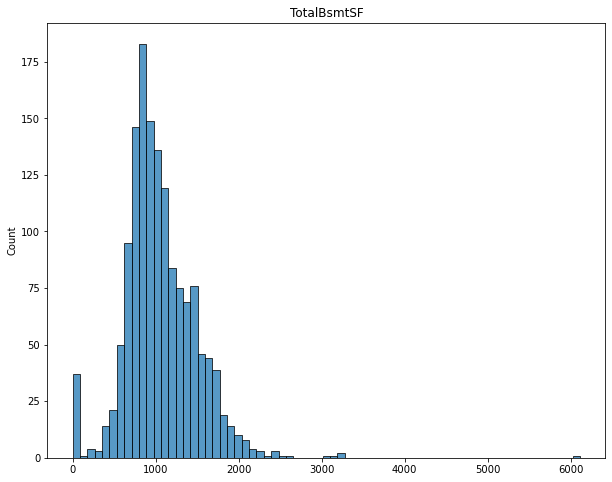

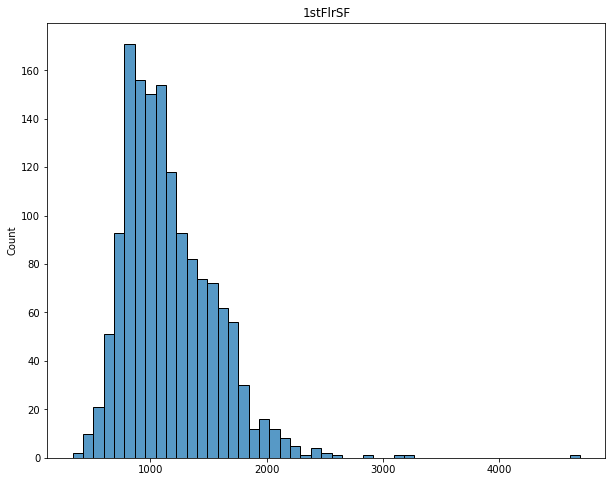

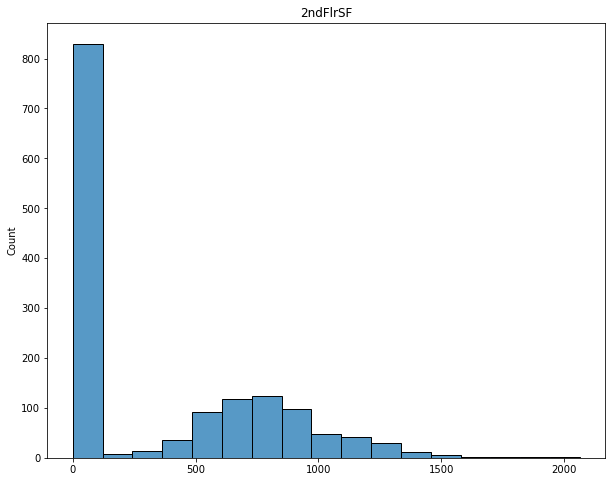

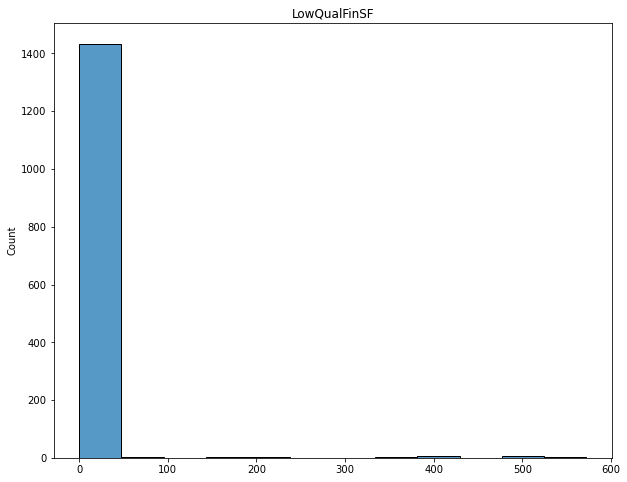

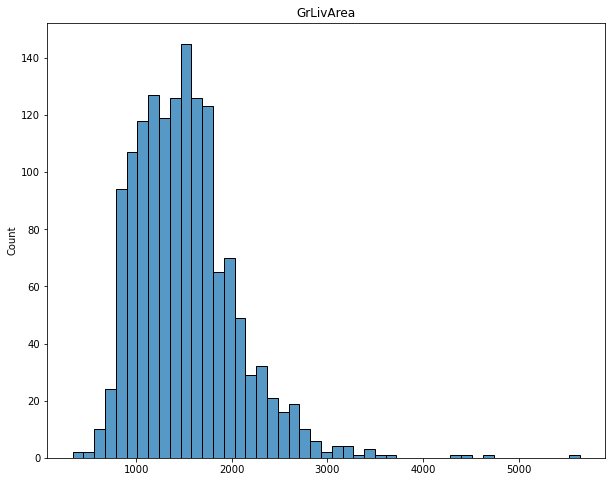

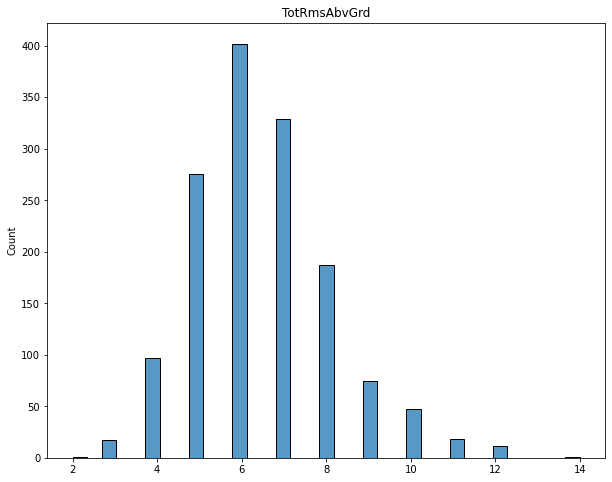

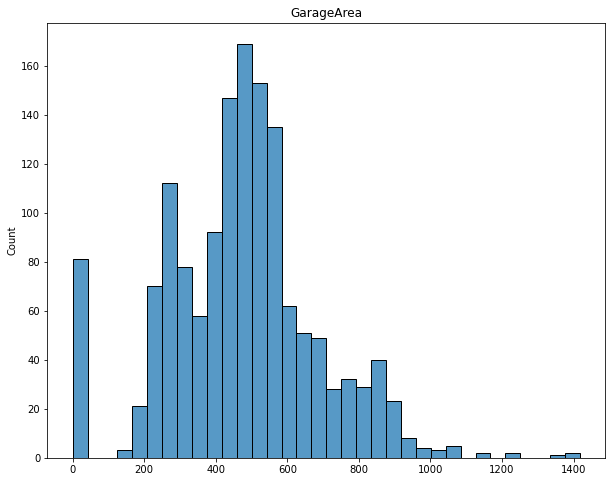

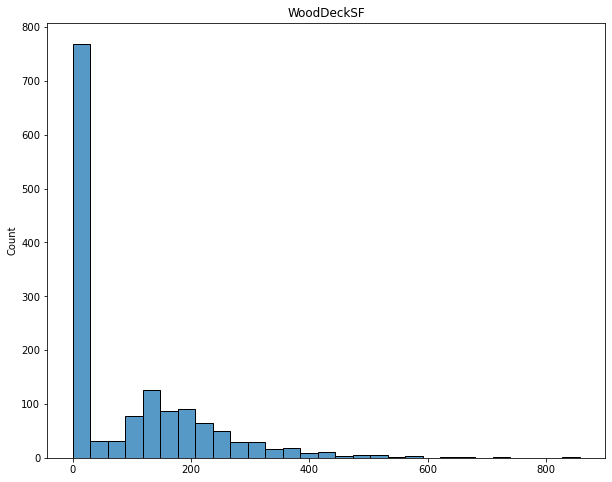

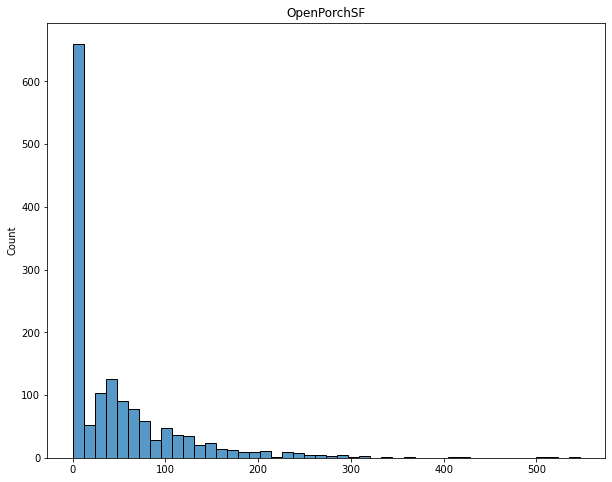

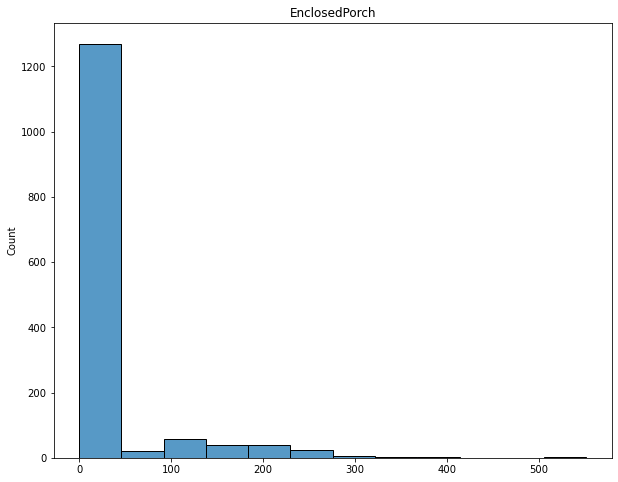

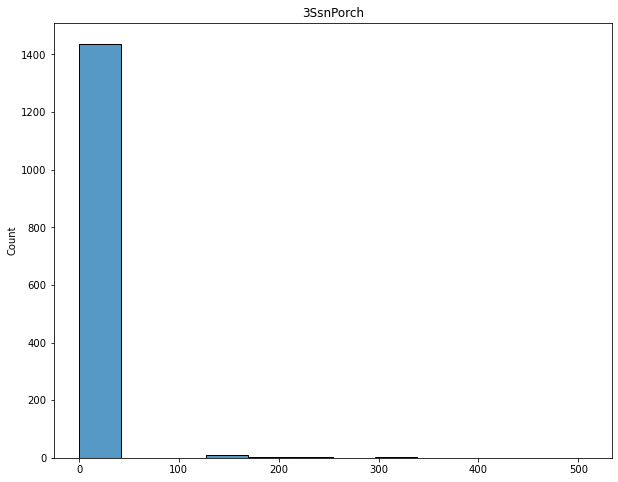

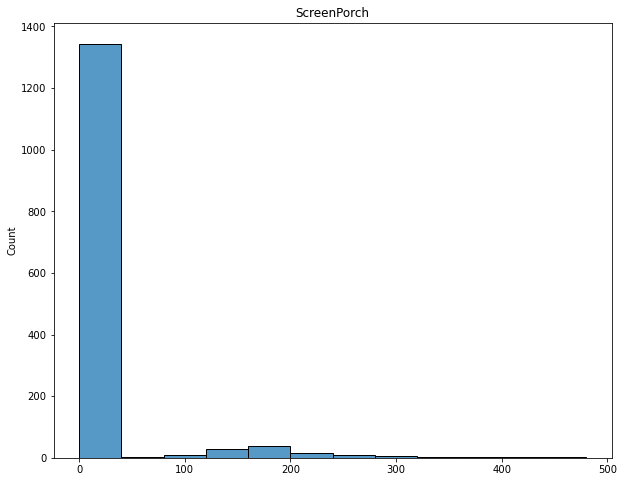

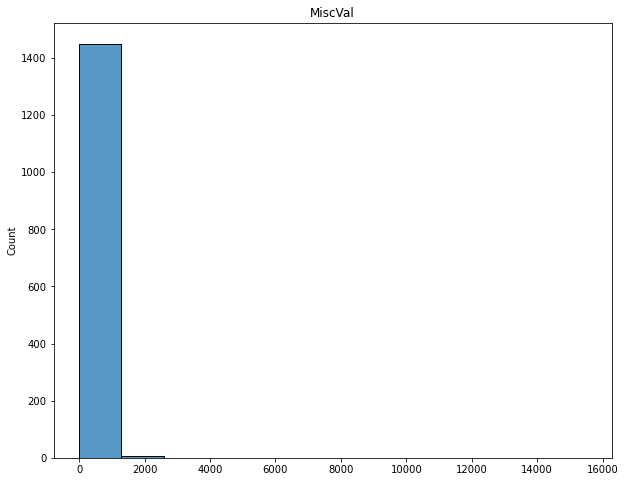

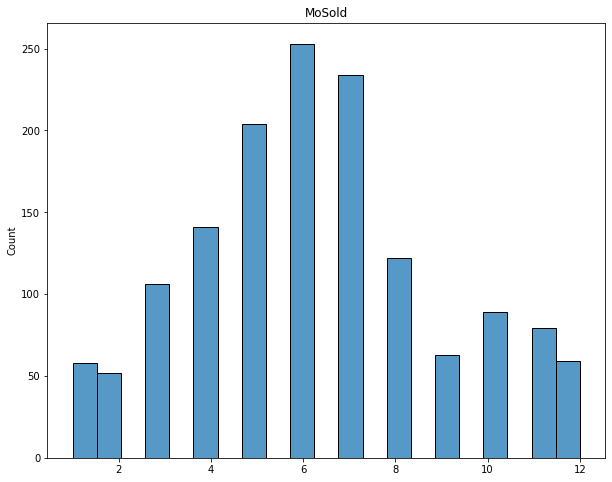

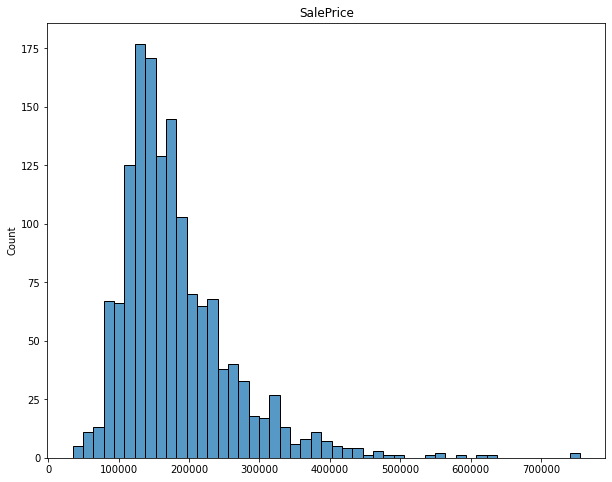

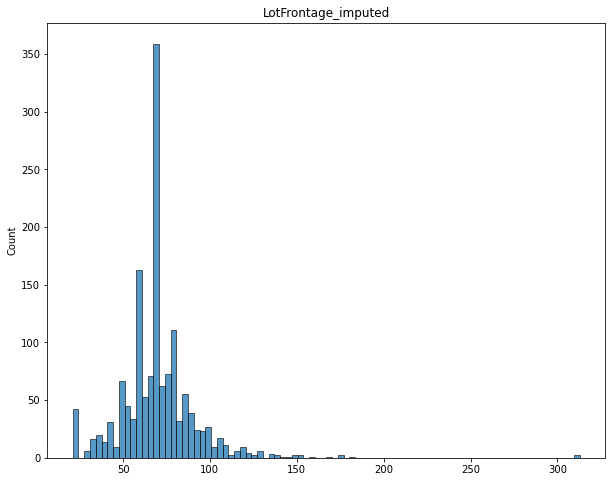

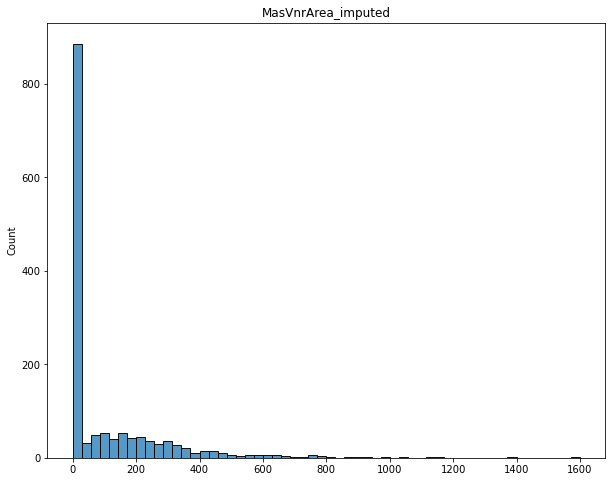

In [160]:
for feature in continious_features:   
    plt.figure(figsize = (10,8))
    sns.histplot(x = df[feature])
    plt.title(feature)
    plt.xlabel(None)

The main part has abnormal distribution or lognormal distribution. 

Mainly, there are 2 ways to treat outliers:

1) IQR range

2) Empirical rule

However, the second one is applicable only in case of normally distributed variables. Hence, the IQR will be used. 
In order to set the borders for being considered as inlier, we will add to the 1st and the 3rd quartiles the IQR multiplied by 1.5. That is commonly used value for this parameter.

In [166]:
for feature in continious_features:
    #computing the Interquartile range 
    IQR = df[feature].quantile(.75) - df[feature].quantile(.25) 
    #lower bound is 25% percentile less 1.5 * IQR
    lower_bound = df[feature].quantile(.25) - 1.5*IQR
    #upper bound is 75% percentile plus 1.5 * IQR
    upper_bound = df[feature].quantile(.75) + 1.5*IQR
    #substituting the extreme values
    df[feature] = np.where(df[feature] > upper_bound, upper_bound, df[feature])
    df[feature] = np.where(df[feature] < lower_bound, lower_bound, df[feature])

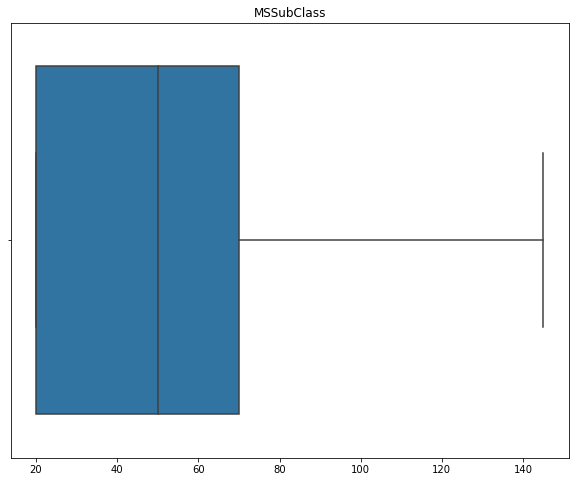

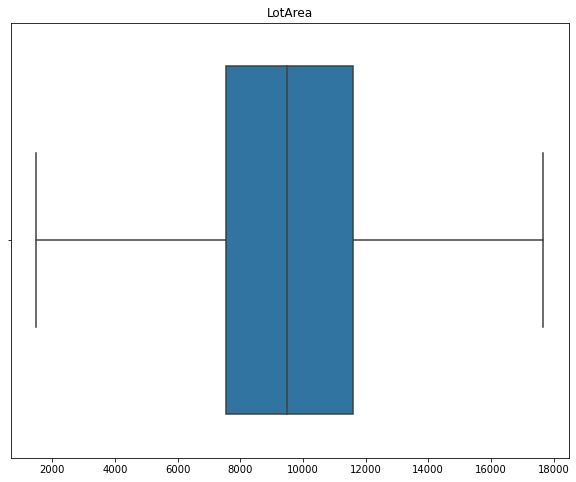

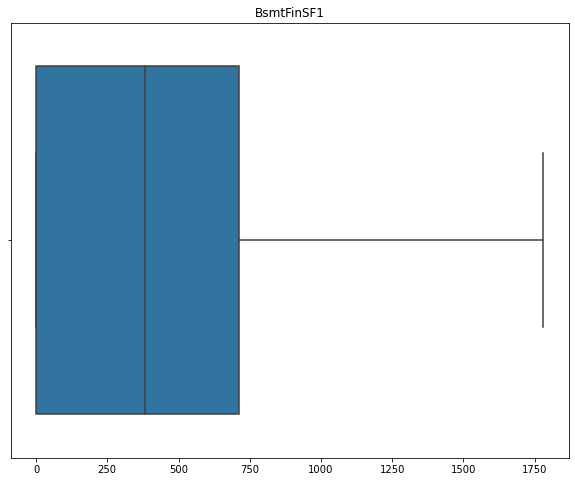

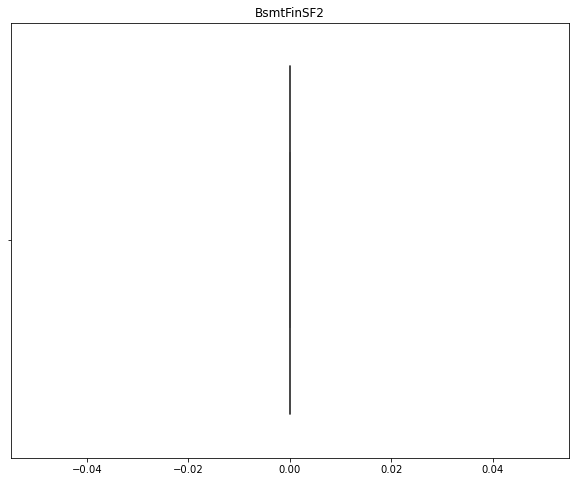

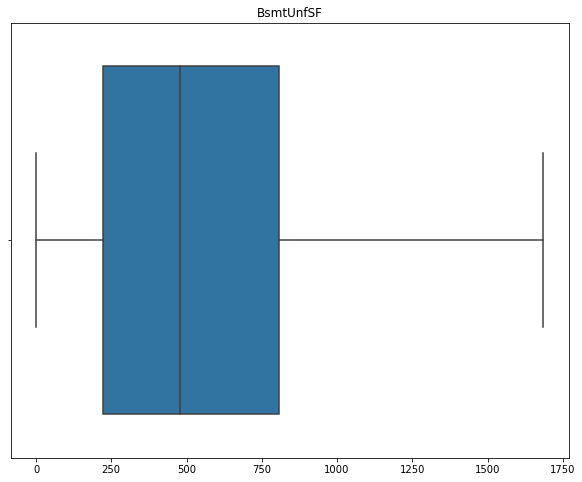

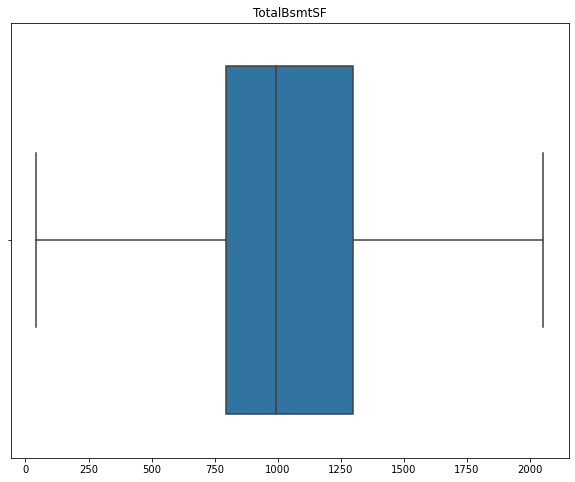

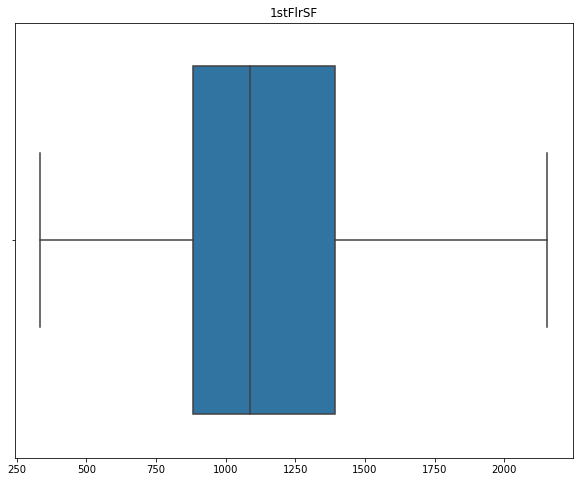

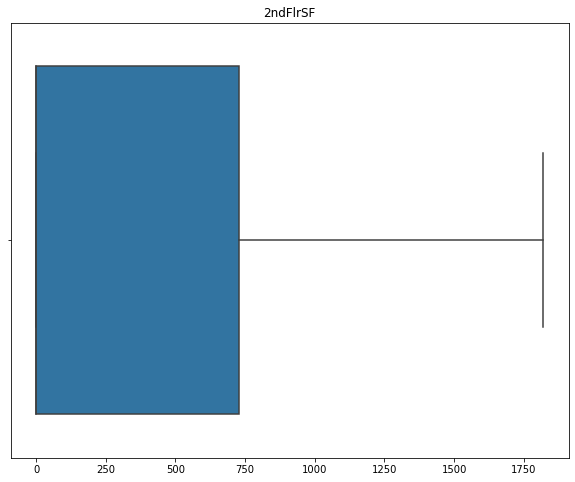

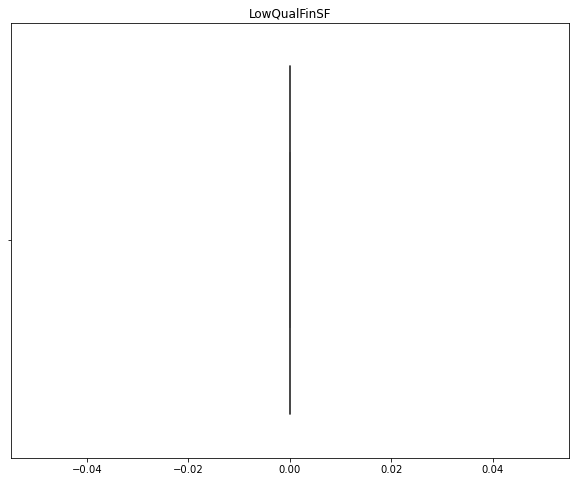

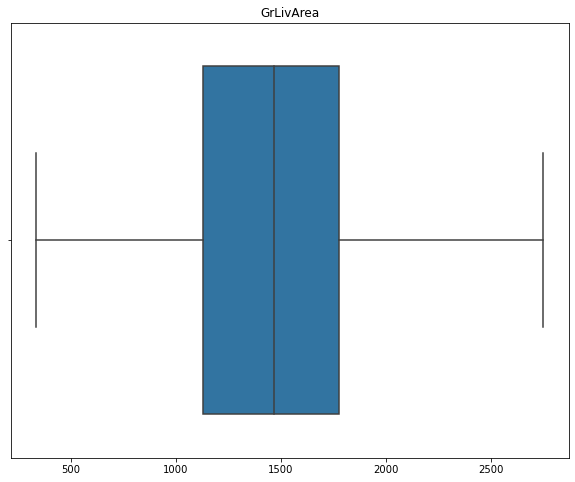

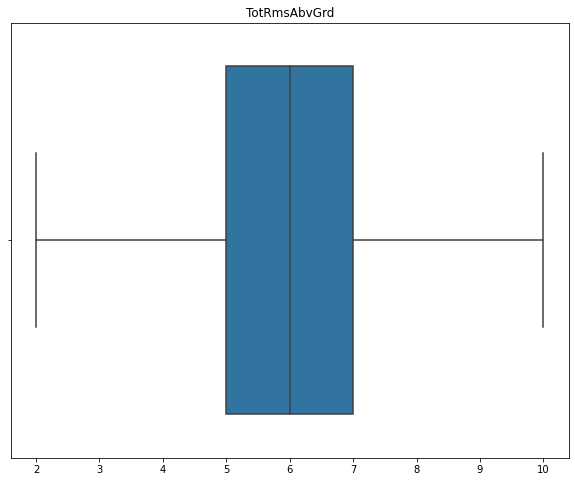

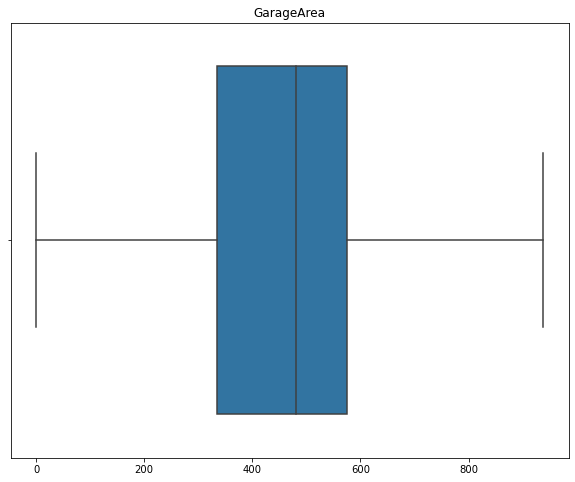

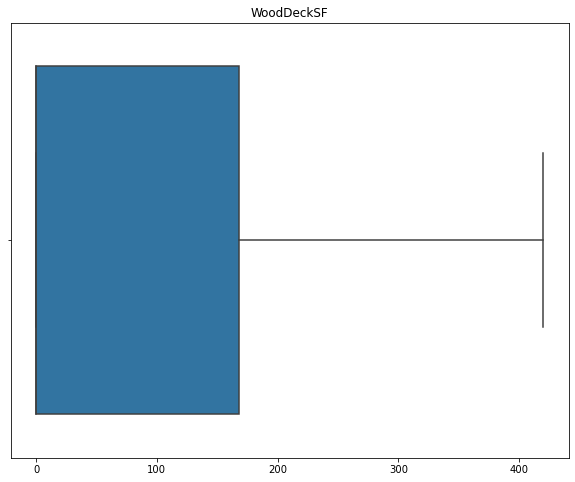

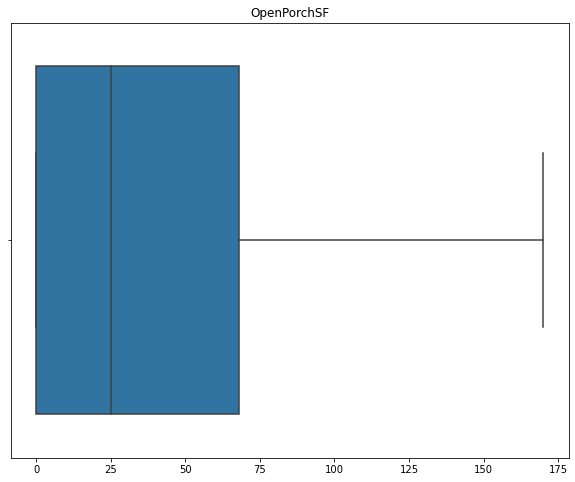

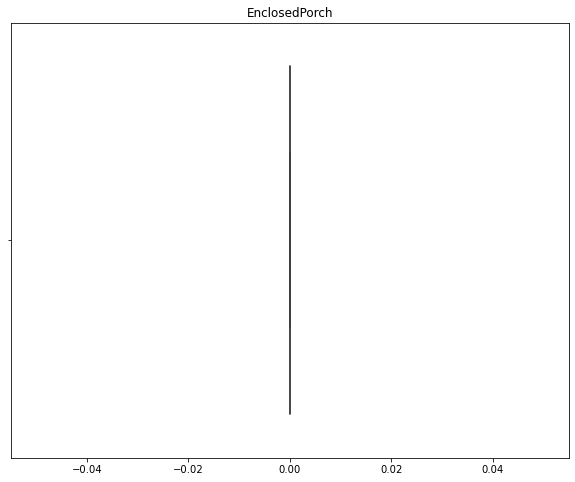

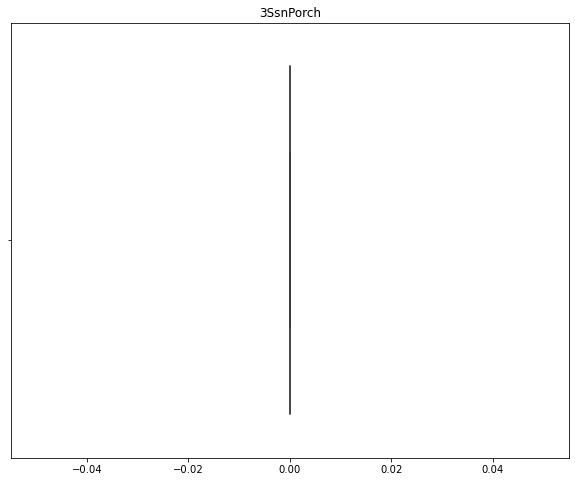

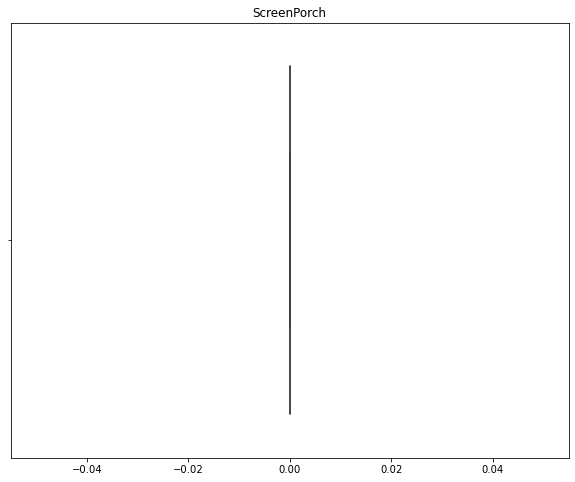

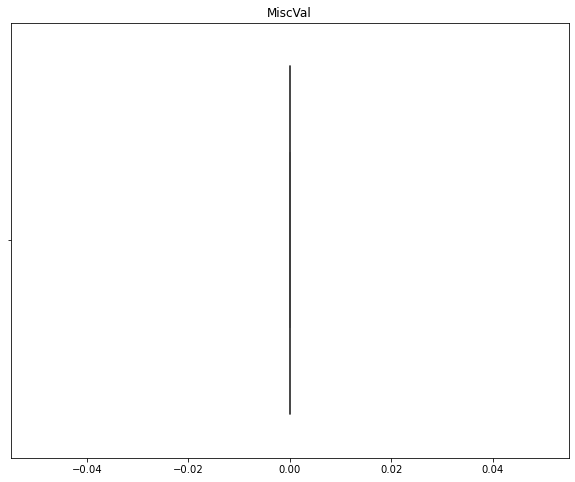

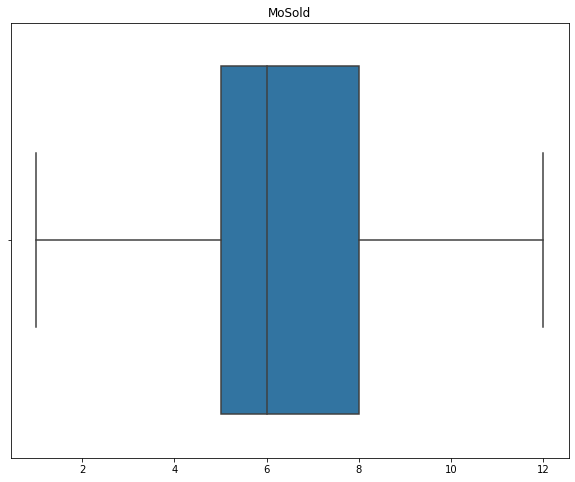

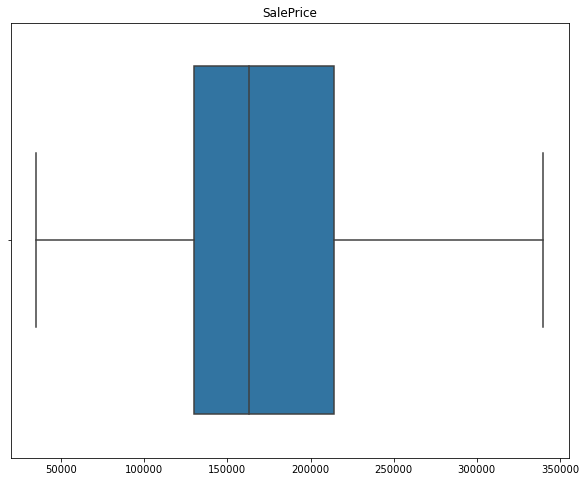

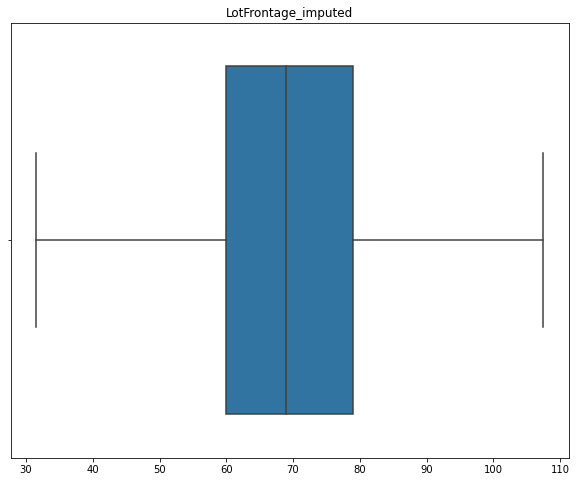

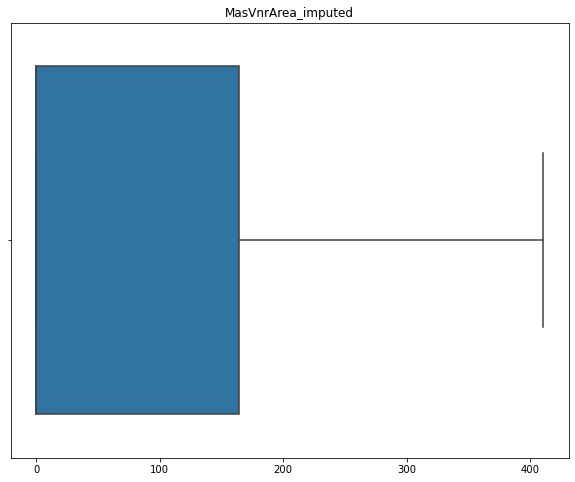

In [168]:
#visualizing the boxplots ones more
for feature in continious_features:   
    plt.figure(figsize = (10,8))
    sns.boxplot(x = df[feature])
    plt.title(feature)
    plt.xlabel(None)

Outliers are detected and deleted. Now we can analyze a little bit the correlations between variables.

## Correlations

<AxesSubplot:>

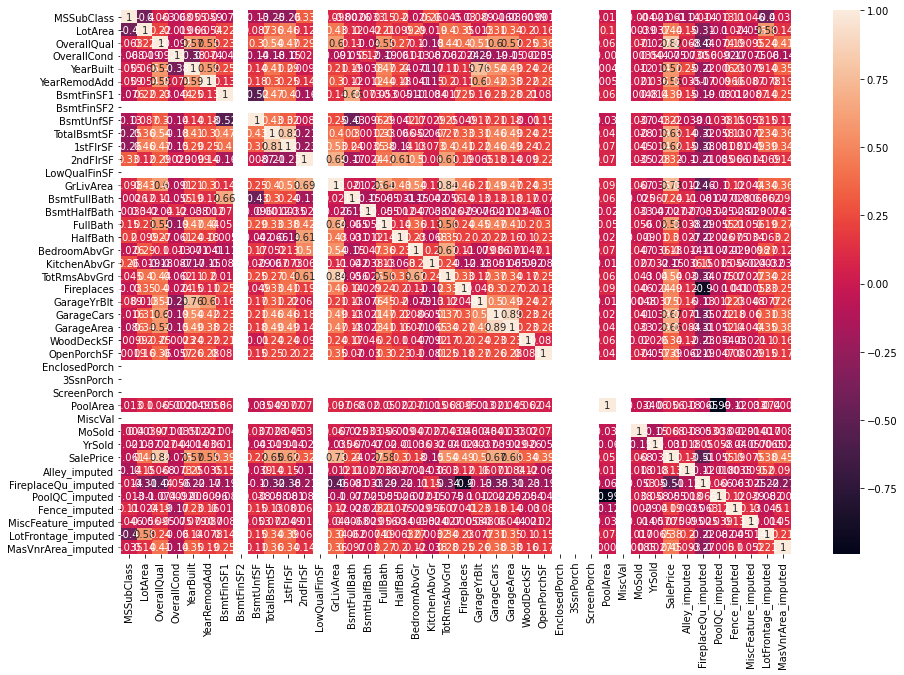

In [170]:
#plotting the correlation matrix via heatmap
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True)

Strange white lines can be seen here. 4 variables are represented only by 1 value. The reason might be that in the beginning, these variables were zeros in the majority of cases and we have treated other values as outliers due to the extreme right skewness. As a result, all values were transformed to 0. That is not a problem, for smaller dimensionality, we will drop them.

In [180]:
to_drop = ['EnclosedPorch', '3SsnPorch','ScreenPorch', 'MiscVal']
df.drop(to_drop, axis = 1, inplace = True)

## Relationships between dependent and independent variables

Now it is time to witness the relationships between the Sale Price of the House(i.e. dependent variable) and its properties(i.e. independent variables). There are 4 types of variables: categorical, discrete, continious and time variables.

Ways to catch relationships with the Sale Price:

1) Categorical and Discrete - comparing the median of Sale Price across the classes

2) Continious - correlation with the Sale Price

3) Time - Sale Price across the time period

### Continious independent variables

In [202]:
#creating a new list of variables for each type since the first ones were created for the missing values.
#list for continious variables
continious_features = [feature for feature in df.columns if df[feature].dtypes != "O" and 
                       df[feature].unique().sum() > 10 and feature not in year_variables and 
                       feature != "SalePrice"]

In [203]:
#number of columns in this list
len(continious_features)

19

In [212]:
correls = {}
for feature in continious_features:
    correl = df["SalePrice"].corr(df[feature]).round(2)
    print(f"{feature} has correlation {correl} with the target variable")
    correls[feature] = correl

MSSubClass has correlation -0.06 with the target variable
LotArea has correlation 0.44 with the target variable
OverallQual has correlation 0.82 with the target variable
OverallCond has correlation -0.08 with the target variable
BsmtFinSF1 has correlation 0.39 with the target variable
BsmtUnfSF has correlation 0.22 with the target variable
TotalBsmtSF has correlation 0.65 with the target variable
1stFlrSF has correlation 0.62 with the target variable
2ndFlrSF has correlation 0.32 with the target variable
GrLivArea has correlation 0.73 with the target variable
BedroomAbvGr has correlation 0.18 with the target variable
TotRmsAbvGrd has correlation 0.54 with the target variable
GarageArea has correlation 0.66 with the target variable
WoodDeckSF has correlation 0.34 with the target variable
OpenPorchSF has correlation 0.39 with the target variable
PoolArea has correlation 0.06 with the target variable
MoSold has correlation 0.07 with the target variable
LotFrontage_imputed has correlation 

Text(0.5, 1.0, 'Correlations with the Sale Price of house')

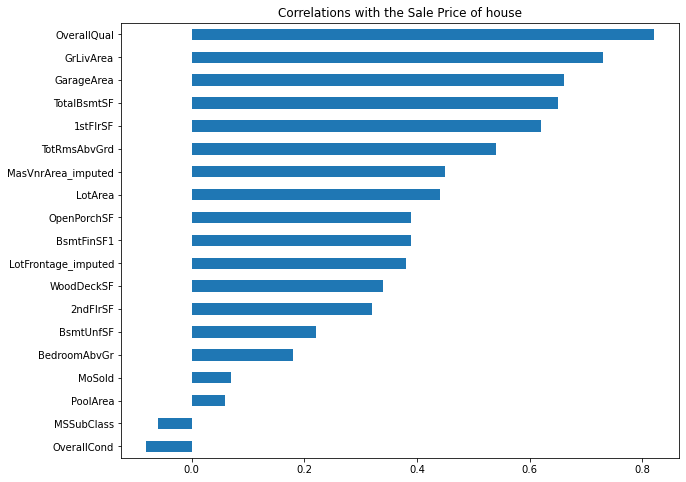

In [220]:
#visualizing the same result
plt.figure(figsize = (10,8))
pd.Series(correls).sort_values(ascending = True).plot(kind = "barh")
plt.title("Correlations with the Sale Price of house")

It can be seen from the chart above that there are several properties of the house that are directly related to its Sale Price. The highest correlation is with **overall quality** of the house: the higher the quality, the higher the price, everything is logically right here. The same situation can be witnessed for **Living Area, Garage Area, Total square feet of basement area and  First Floor square feet**. Talking about the rest of the variables, here the correlation is not so strong, it is either medium of week.

### Time data

Now lets move to the time/periodic data and see how the price for the house has been changed through the years.

In [194]:
#reminding the variables itself
year_variables

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

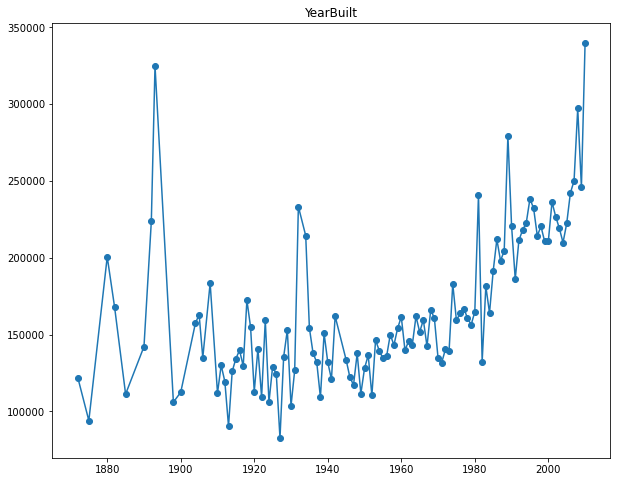

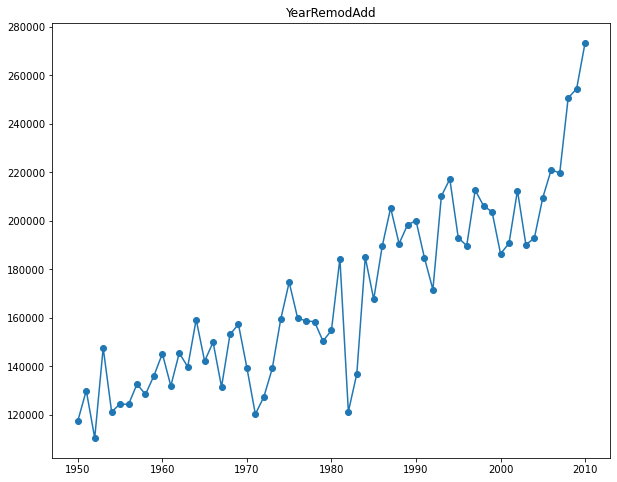

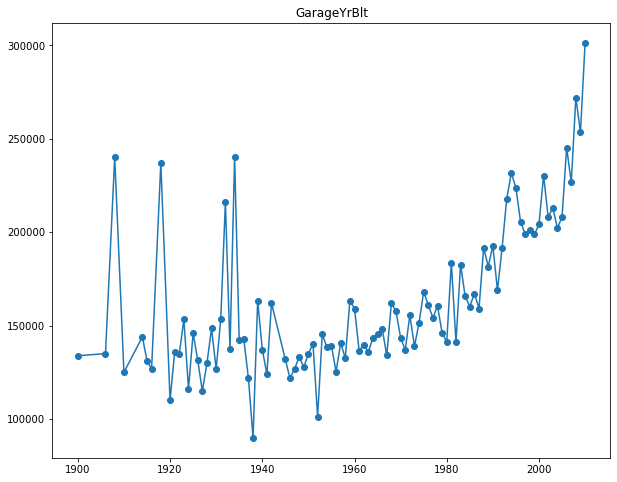

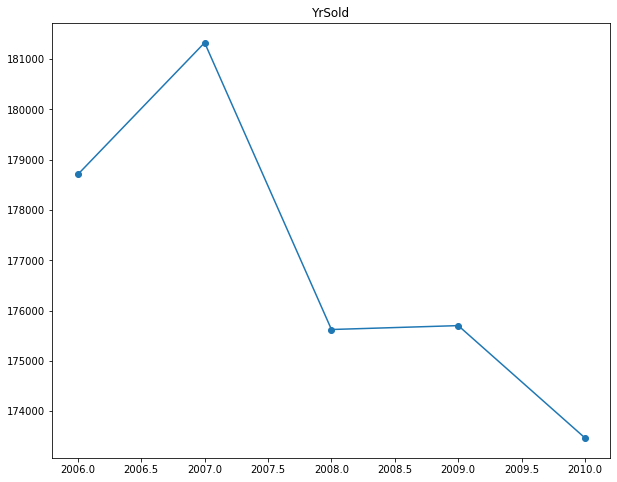

In [232]:
for feature in year_variables:
    plt.figure(figsize = (10,8))
    df.groupby(feature)["SalePrice"].mean().plot(kind = "line", marker = "o")
    plt.title(feature)
    plt.xlabel(None)

1) **YearBuilt** - in total, there is no straightforward trend like "the older the house the cheaper it is". Moreover, houses built in ~1890 are of the same value as the newest ones, they have the highest mean prices.

2) **YearRemodAdd** - since it can be the same value as the (1) variable, the picture is similar, however, here the trend line can be seen without any picks and valleys like in the 1890.

3) **GarageYrBlt** - this variable shows some unexpected fluctuations in the 1900-1940, and the upward trend line can be detected later on in hte period.

4) **YrSold** - here we have only 4 years of data since the houses are being sold during the 2006-2010. That is why the conclusions might be incorrect, however, one can see that the mean sale pruce at the beginning was much higher than in the end of the period.

### Discrete and Categorical features

In [233]:
#the list of columns for discrete variables
discrete_features = [feature for feature in df.columns if df[feature].dtypes != "O" and 
                       df[feature].unique().sum() <= 10 and feature not in year_variables]

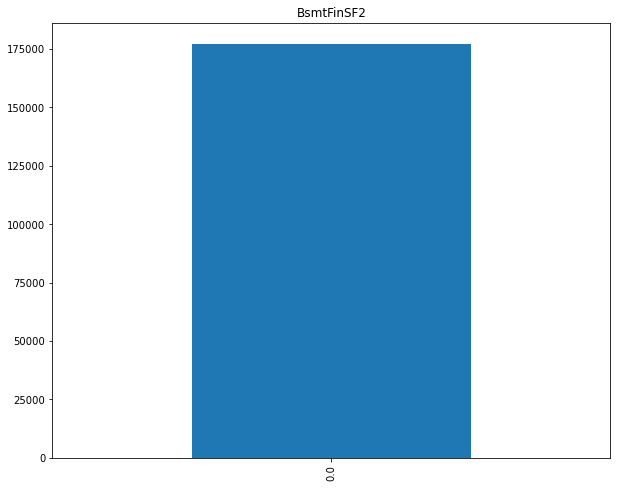

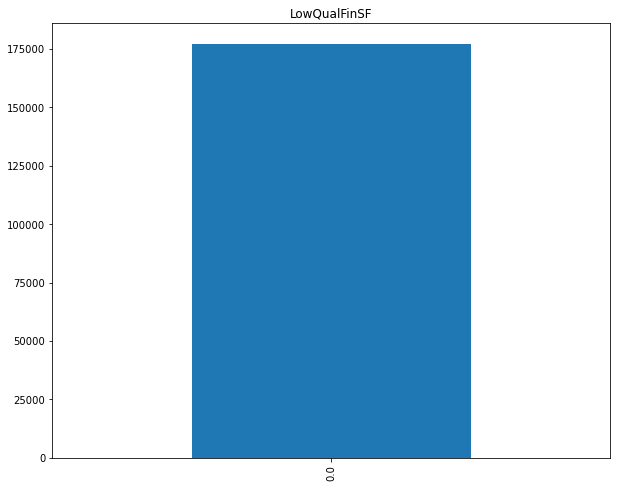

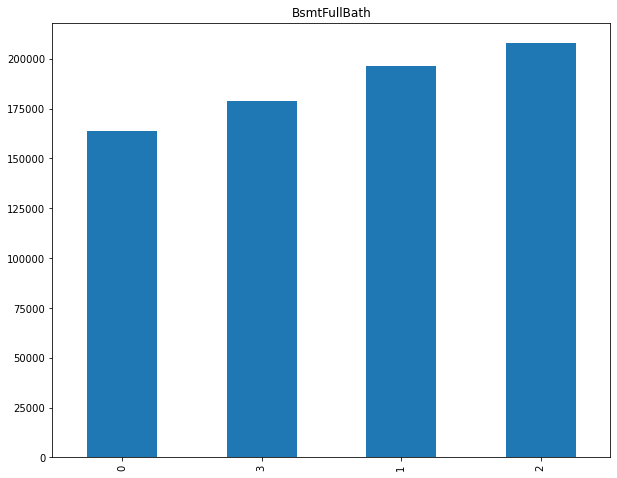

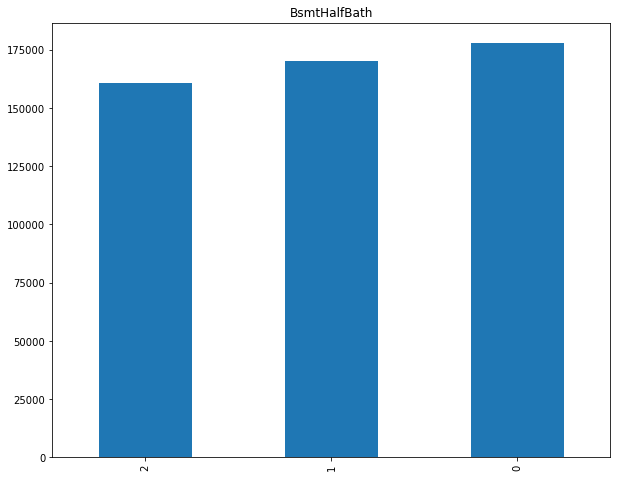

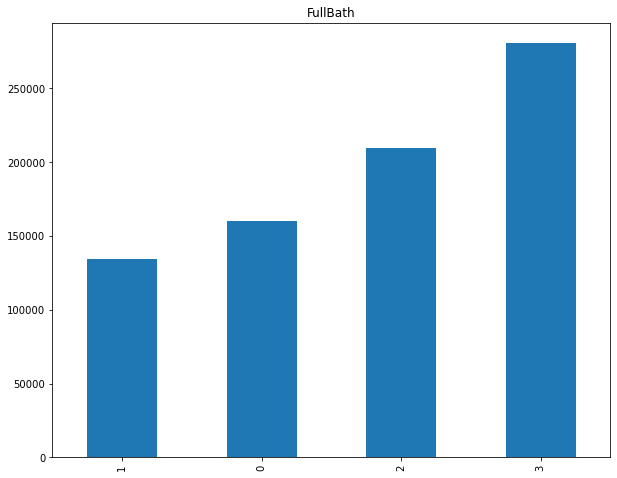

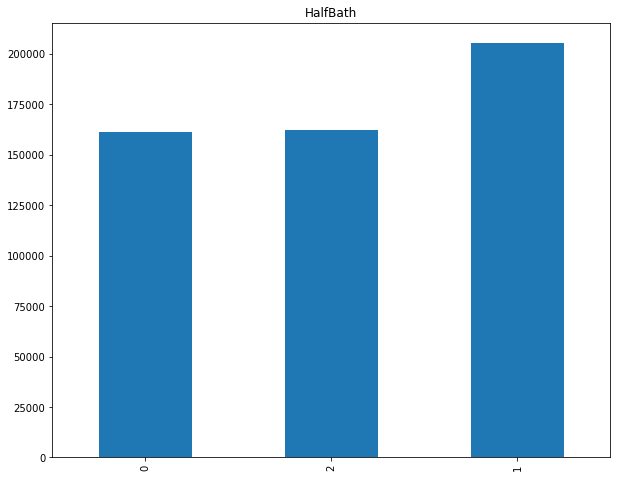

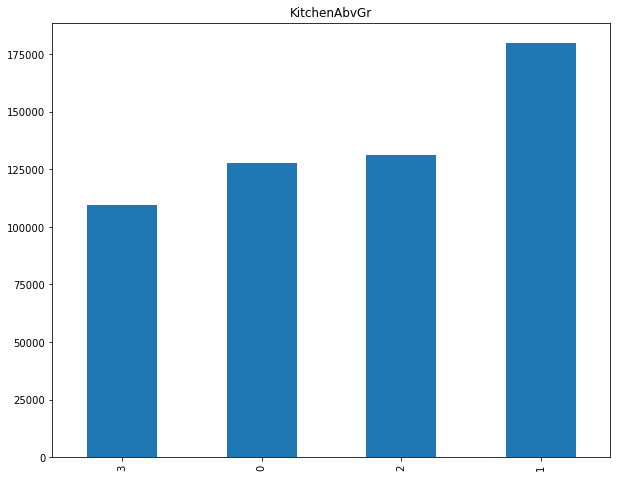

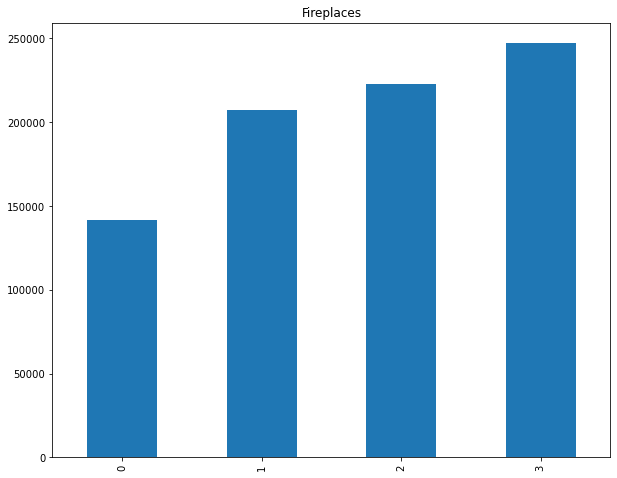

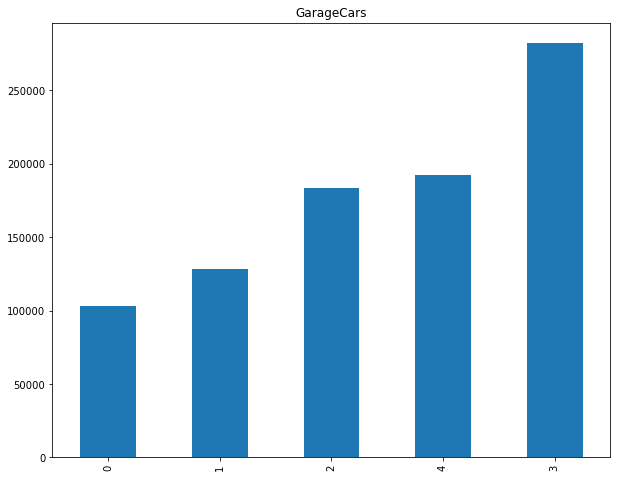

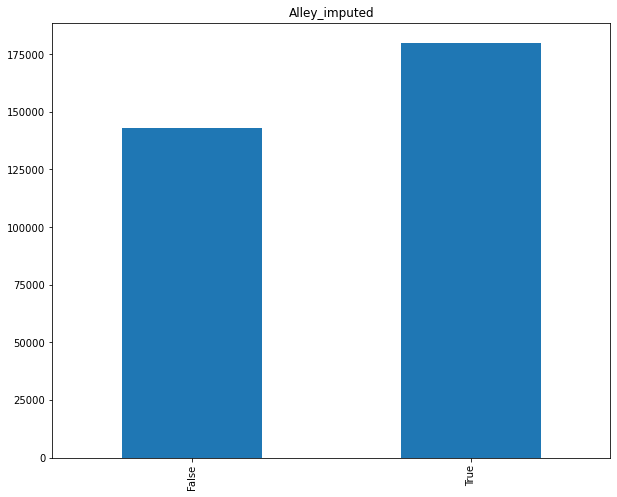

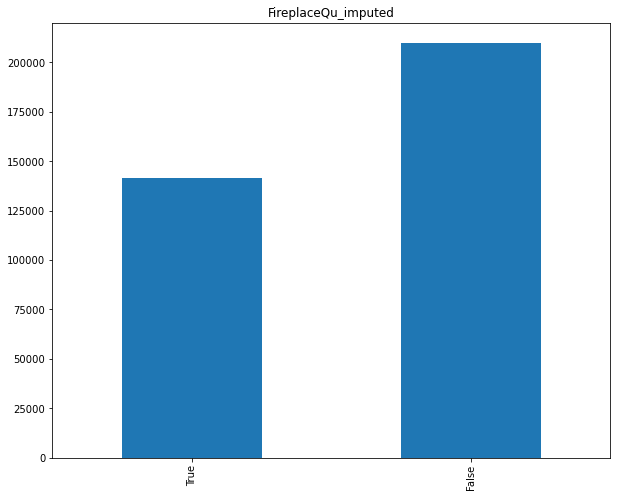

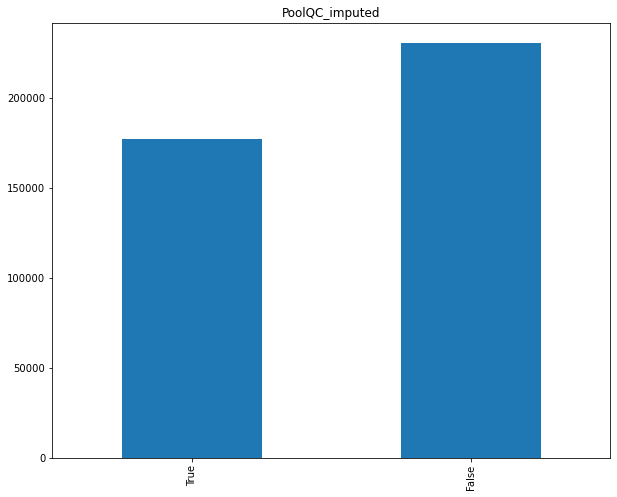

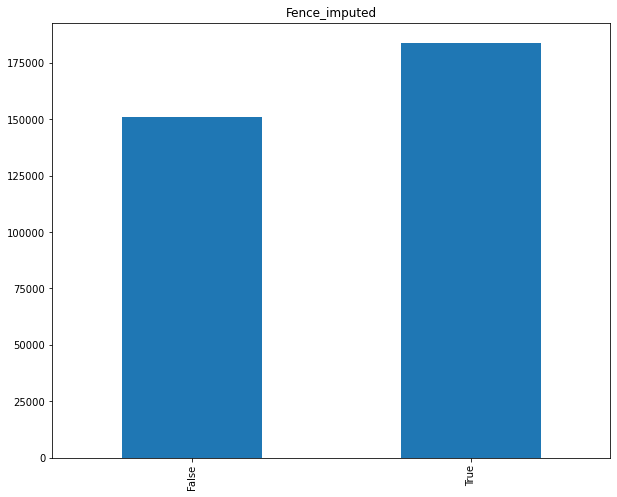

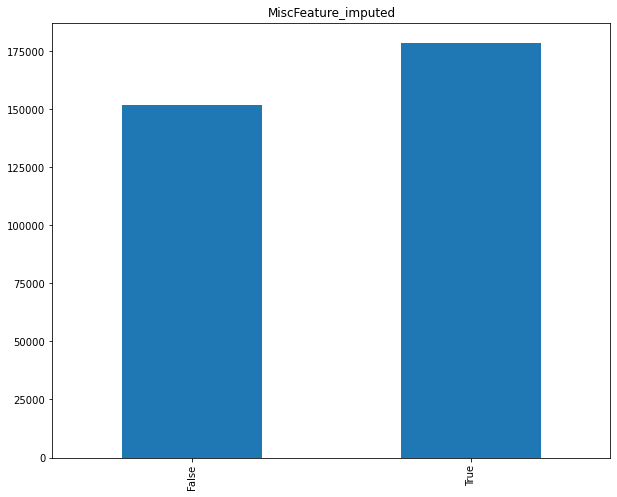

In [247]:
for feature in discrete_features:
    plt.figure(figsize = (10, 8))
    df.groupby(feature)["SalePrice"].mean().sort_values(ascending = True).plot(kind = "bar")
    plt.title(feature)
    plt.xlabel(None)

**Main conclusions:**

1) BsmtFinSF2 and LowQualFinSF should be removed(only zeros)

2) The more fireplaces the house obtain, the higher the mean sale price

3) Houses with 3 cars of garage capacity are of the highest value

In [234]:
#and for categorical
categorical_features = [feature for feature in df.columns if df[feature].dtypes == "O"]

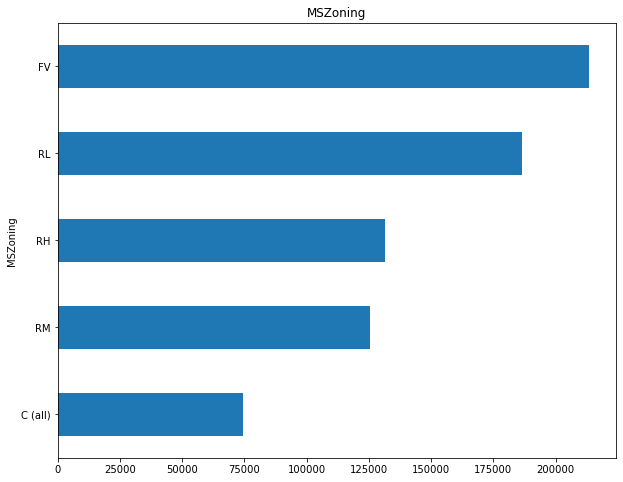

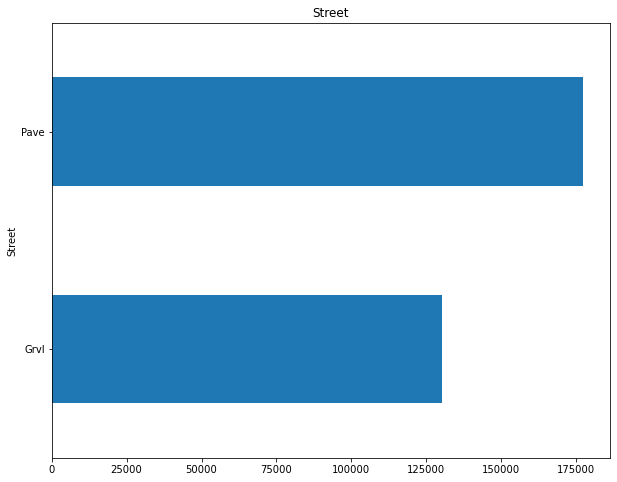

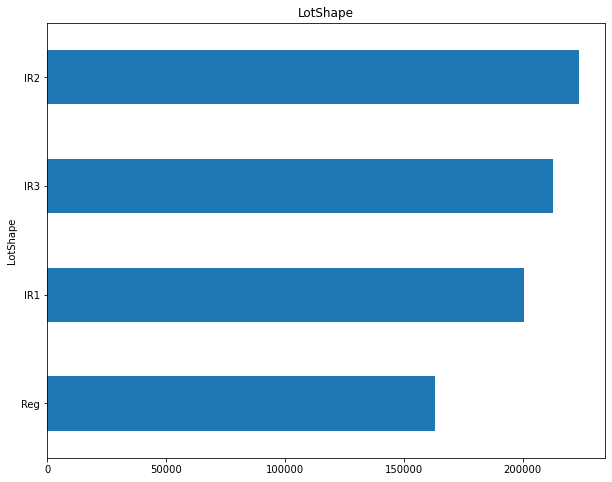

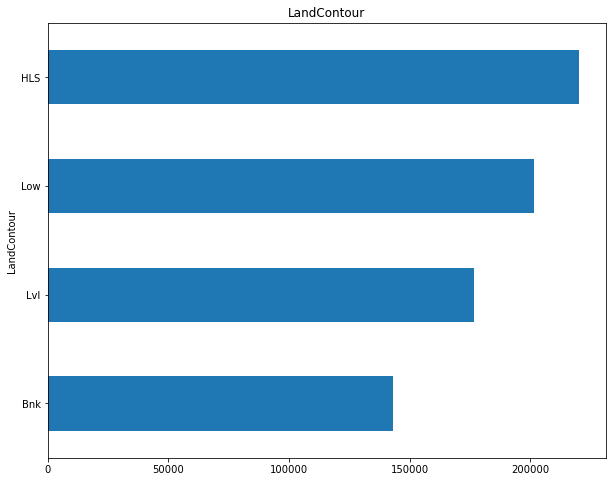

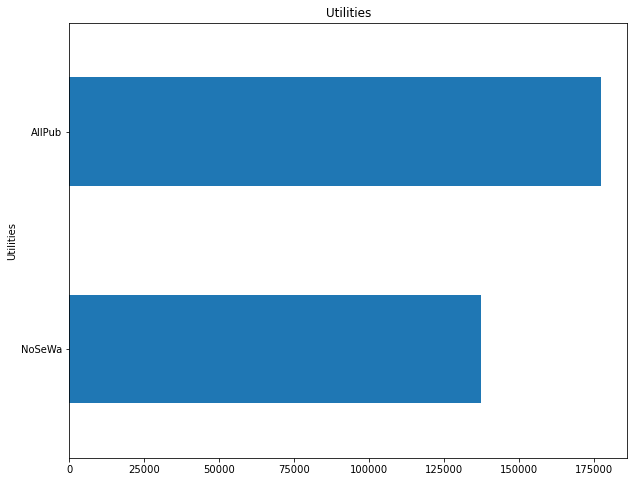

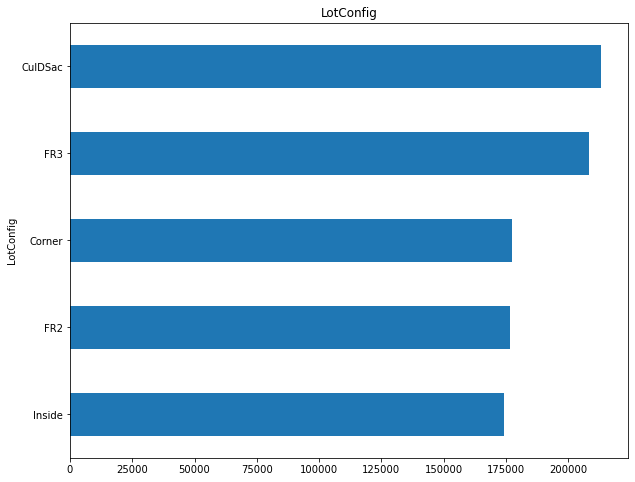

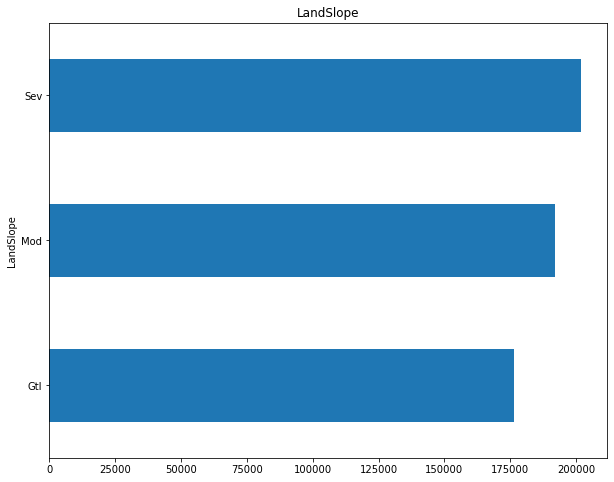

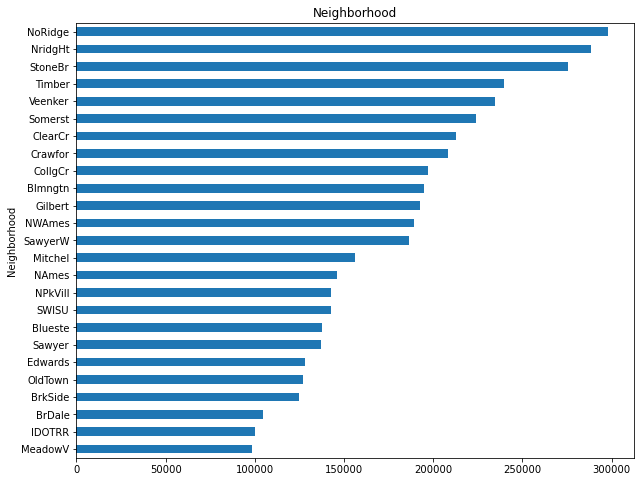

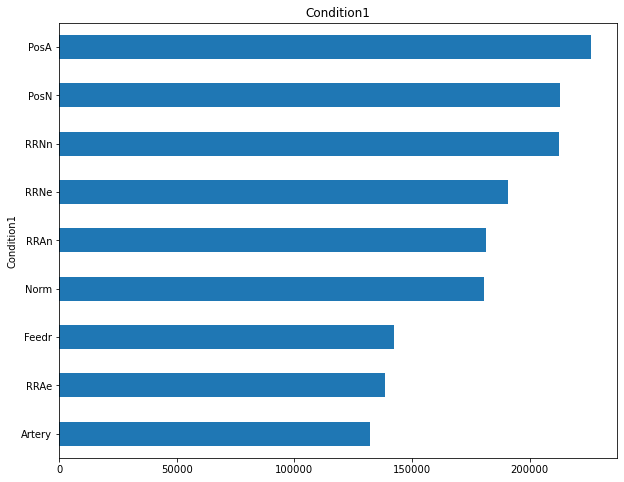

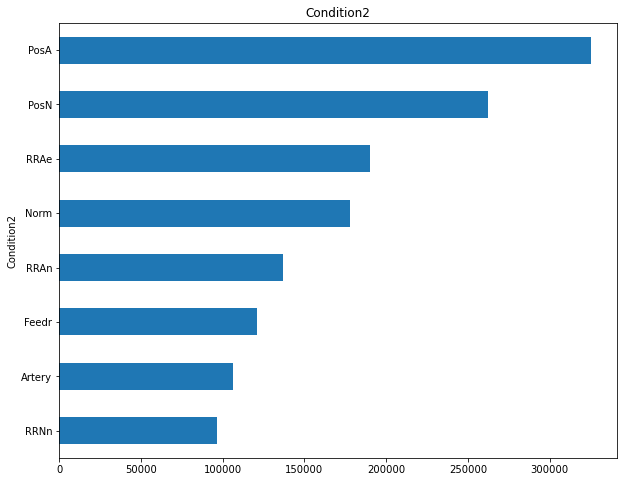

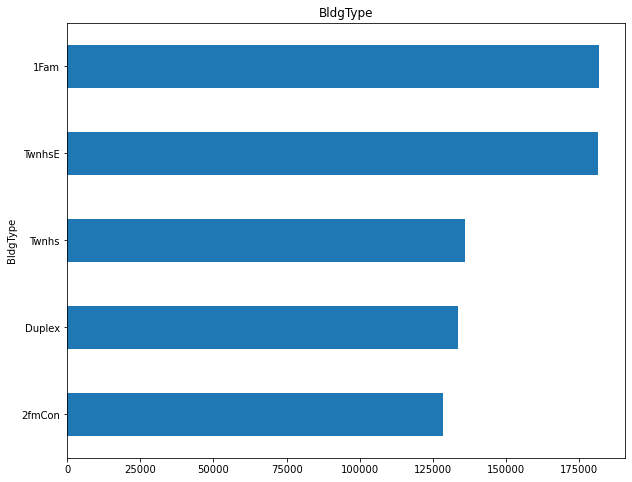

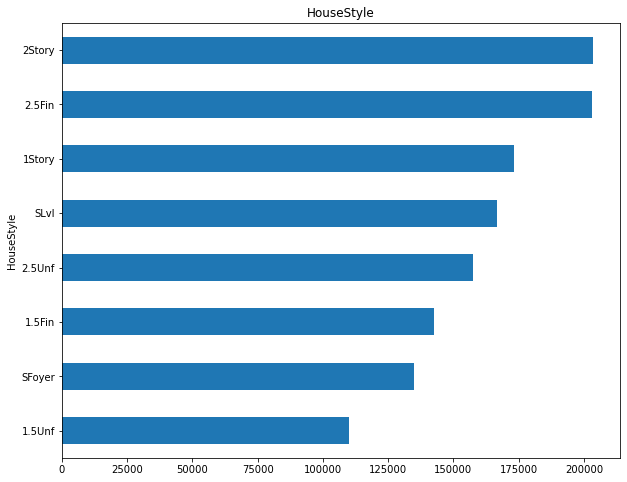

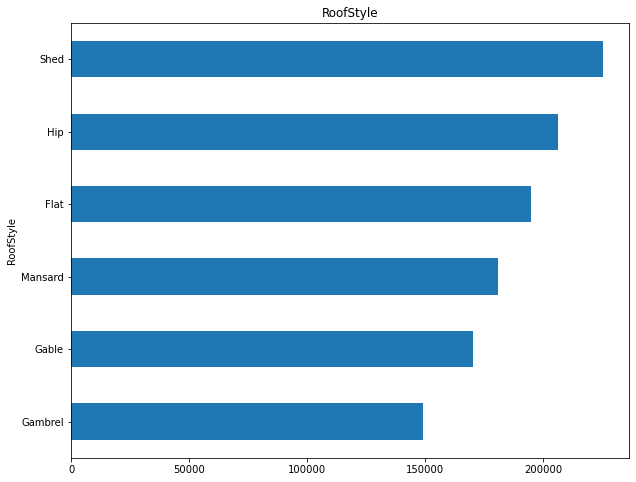

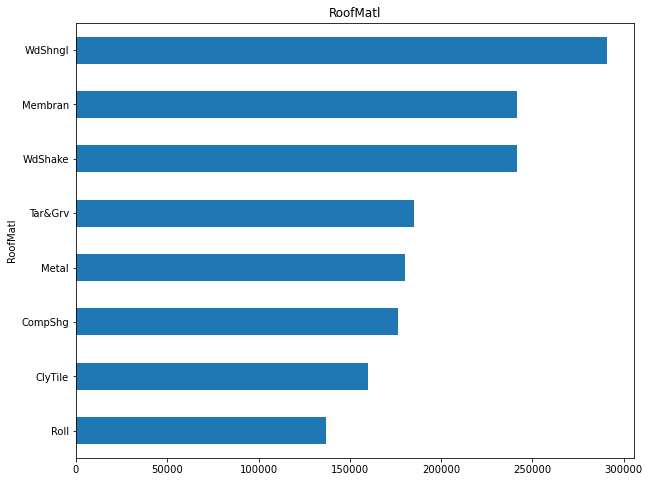

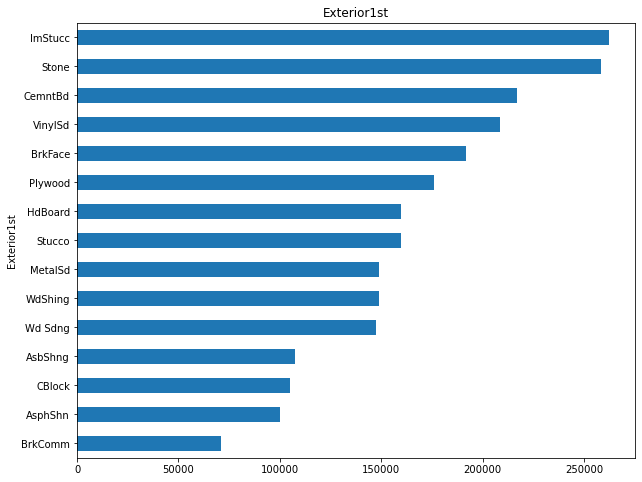

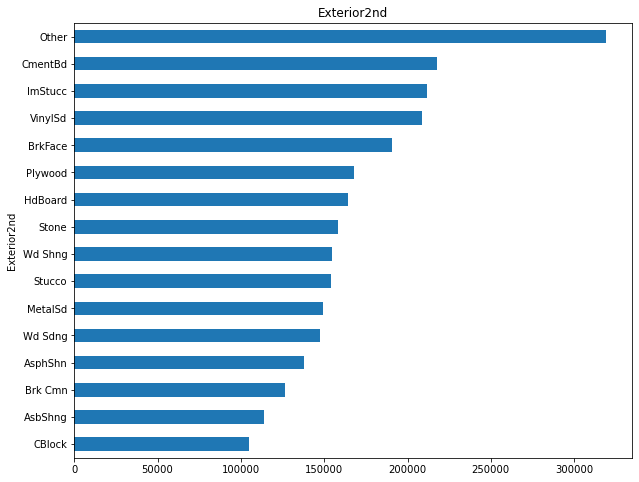

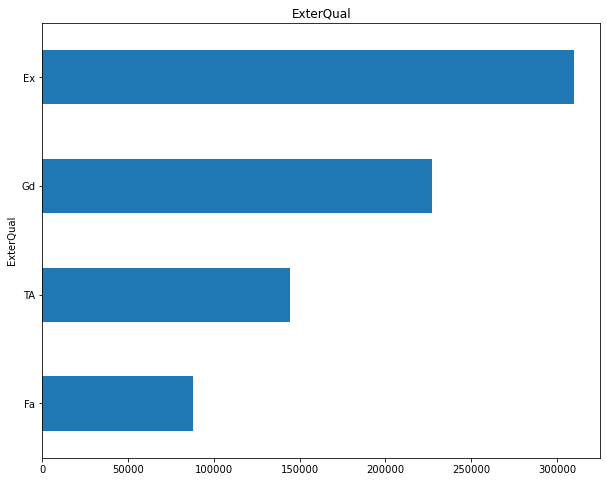

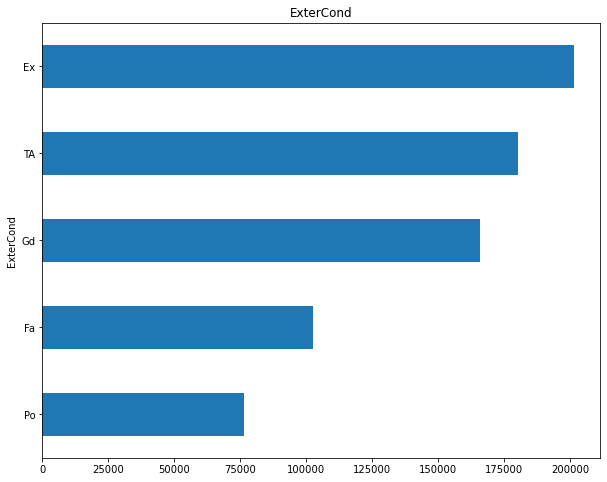

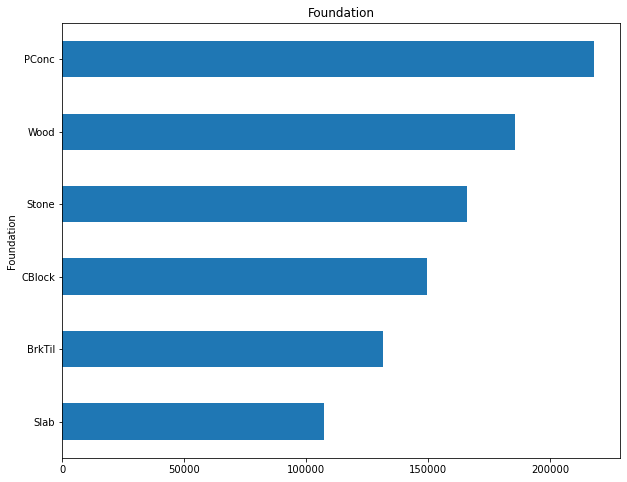

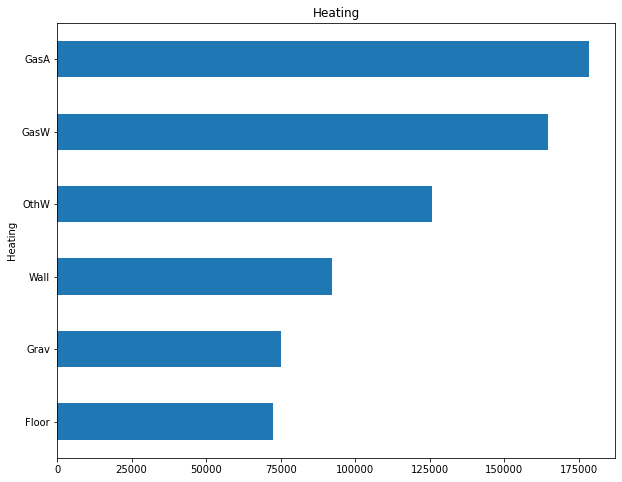

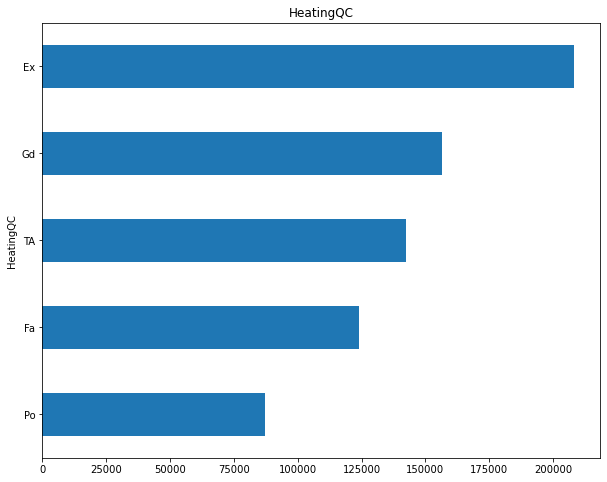

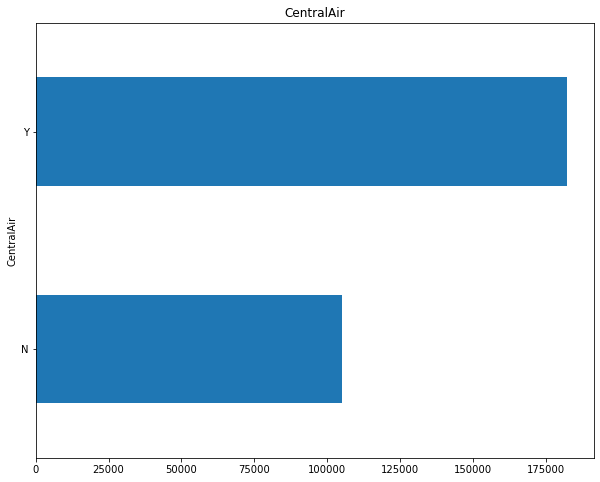

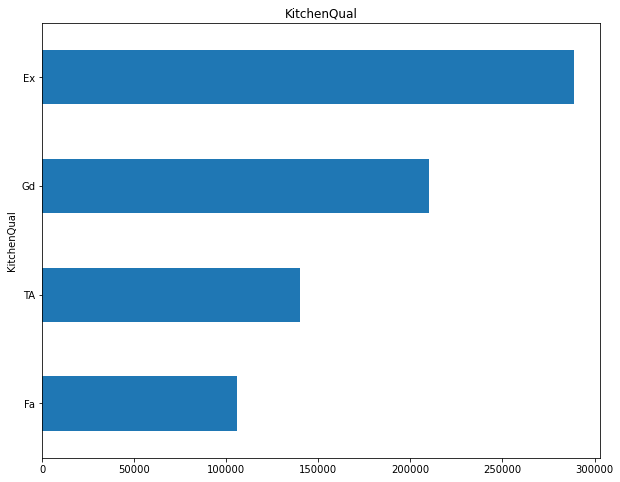

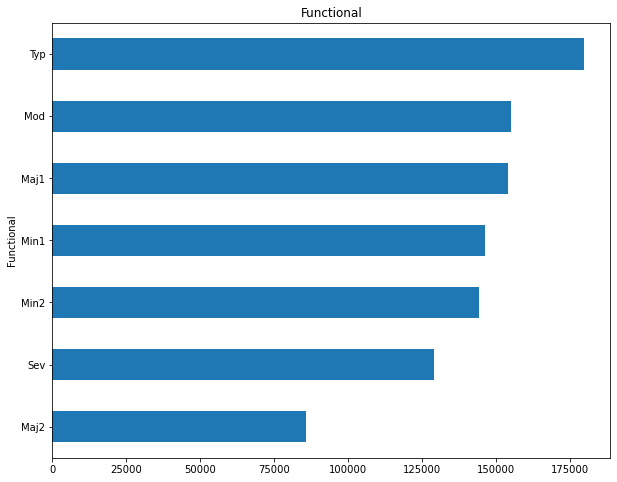

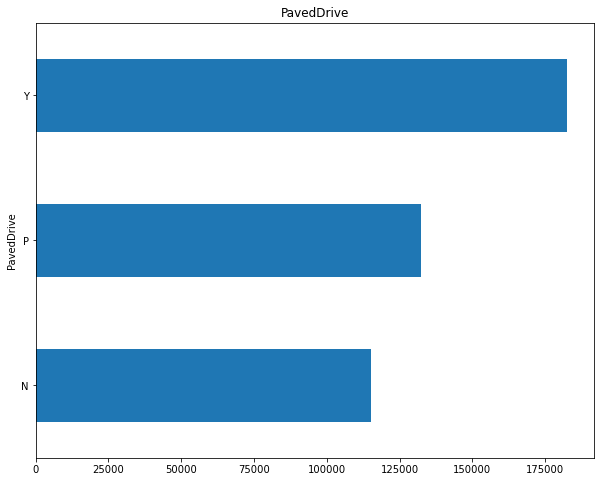

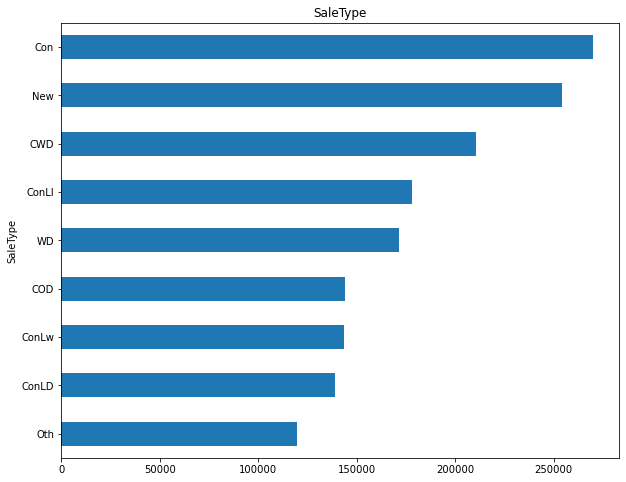

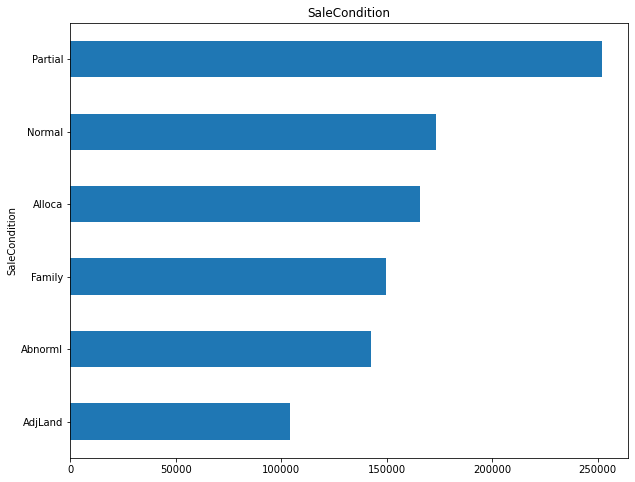

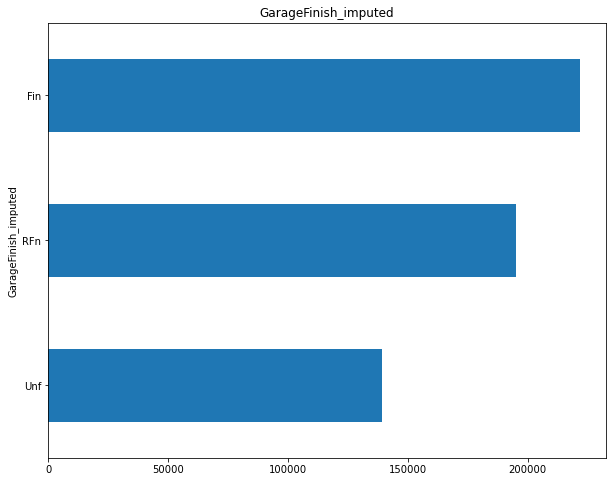

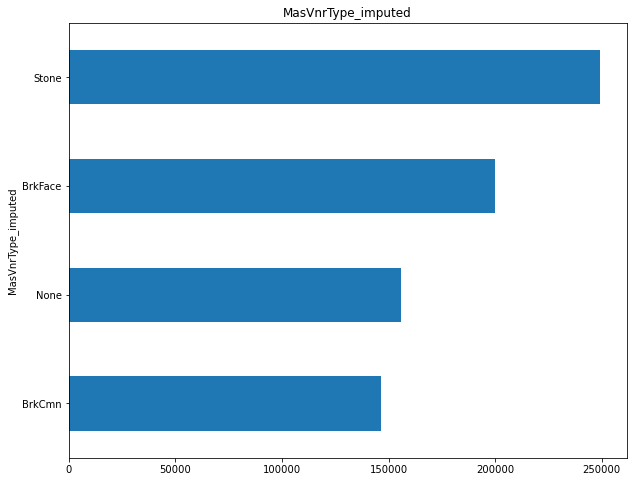

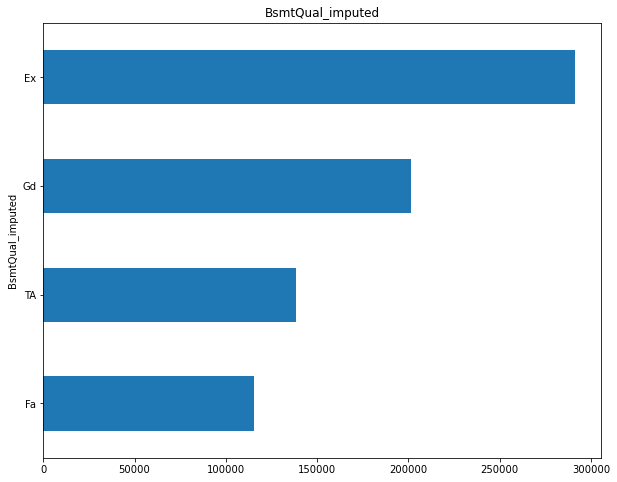

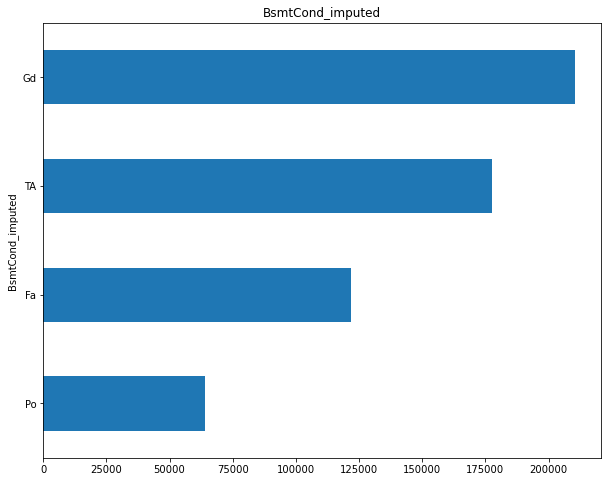

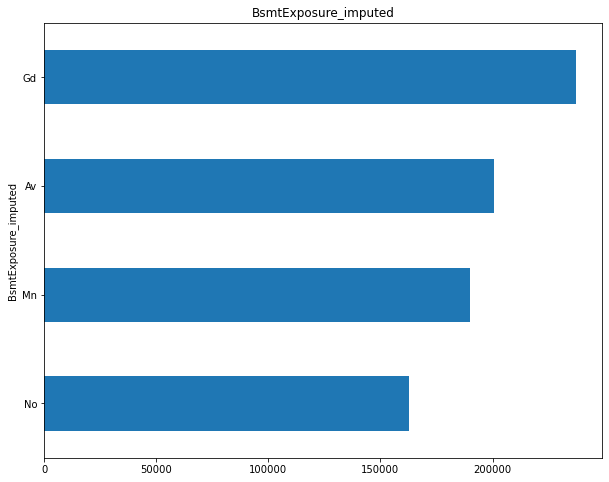

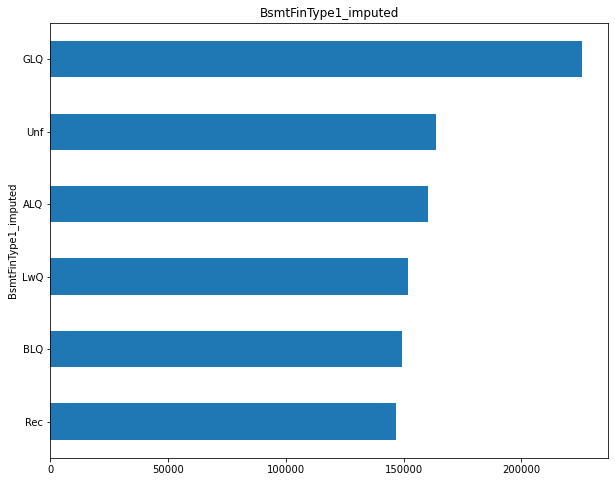

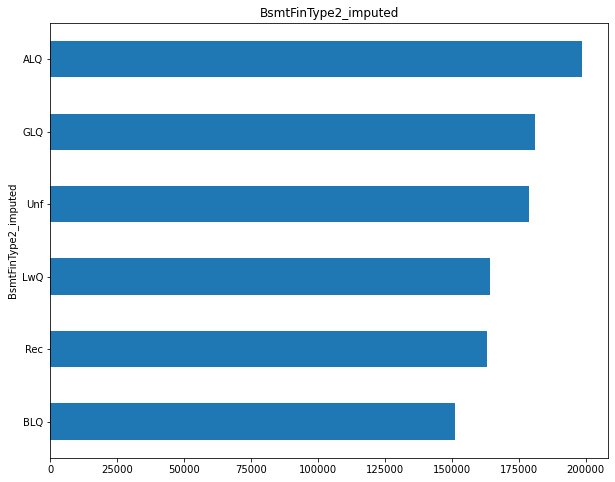

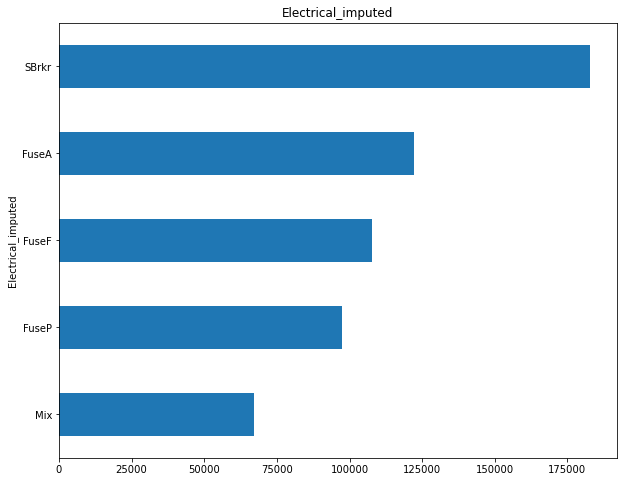

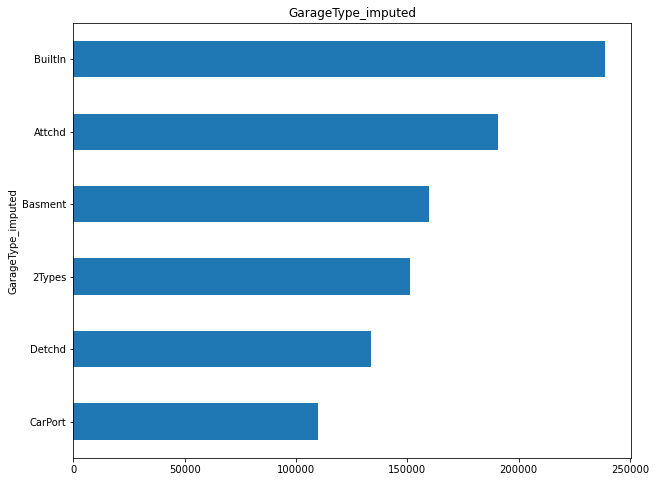

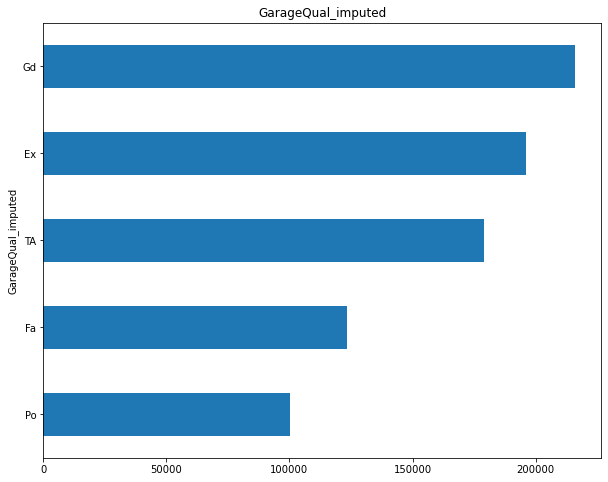

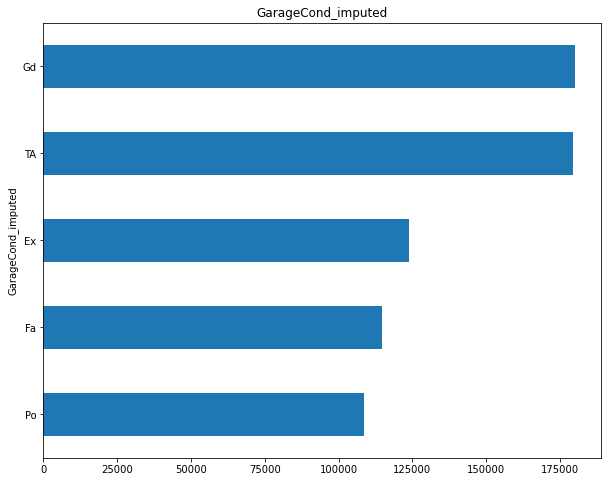

In [245]:
for feature in categorical_features:
    plt.figure(figsize = (10, 8))
    df.groupby(feature)["SalePrice"].mean().sort_values(ascending = True).plot(kind = "barh")
    plt.title(feature)
    plt.xlabel(None)

**Main conclusions:**

1) Floating Village Residential is the most expensive zone for house

2) Pave road will cost more than gravel

3) Houses with the significant slope from side to side are more valuable than those with no slopes and hills

4) All public utilies presence will increase the final cost of house

5) Houses near NoRidge, NridgHt and StoneBr are the most expensive

**6) There are many similar conclusions, however, one does not know yet which are the most important for the final prediction of the sale price. We will return to this issue later on when dealing with the feature importance of the final model.**

In [250]:
#checking that all columns were plotted
len(continious_features + year_variables + discrete_features + categorical_features) == len(df.columns) - 1

True

## Data Preprocessing

The next step is to start preparing the data for model implementation.

In [257]:
#getting dummy variables
df_dummy = pd.get_dummies(df, drop_first = True)
print(df_dummy.shape)

(1460, 234)


###  Splitting the data into dependent and independent variables

In [258]:
X = df_dummy.drop("SalePrice", axis = 1)
y = df_dummy["SalePrice"]

### Splitting on the train and test sets

In [259]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(f"Train data shape: {X_train.shape} \n Test data shape: {X_test.shape}")

Train data shape: (1168, 233) 
 Test data shape: (292, 233)


### Scaling the data 

Since the outliers were treated, we will use StandardScaler(which is sensitive to the outliers)

In [260]:
from sklearn.preprocessing import StandardScaler
#initializing the scaler
scaler = StandardScaler()

In [261]:
#transforming the train data
X_train_scaled = scaler.fit_transform(X_train)
#transforming the test data
X_test_scaled = scaler.transform(X_test)

## Baseline establishment

All EDA and data preprocessing have been covered and the first models can be created now.

#### Linear Regression

In [262]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [263]:
#defining the function to compute the score faster
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
def score(actual_values, predicted_values):
    mae = mean_absolute_error(actual_values, predicted_values)
    rmse = mean_squared_error(actual_values, predicted_values, squared = False)
    mape = mean_absolute_percentage_error(actual_values, predicted_values)
    
    return print(f"MAE: {mae}\nRMSE: {rmse}\nMAPE: {mape}")

In [269]:
lr = LinearRegression(n_jobs = -1)
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

score(y_test, lr_pred)

MAE: 619136371827062.8
RMSE: 6654854200372134.0
MAPE: 3980472091.7884345


In [267]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)

score(y_test, lasso_pred)

MAE: 17600.271122196125
RMSE: 28620.614793450735
MAPE: 0.1112945358402983


In [268]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)

score(y_test,ridge_pred)

MAE: 17549.47580224119
RMSE: 28713.109290599925
MAPE: 0.11090543245888623


#### Support Vector Machines

In [270]:
from sklearn.svm import LinearSVR, SVR

In [271]:
lr_svr = LinearSVR()
lr_svr.fit(X_train_scaled, y_train)
lr_svr_pred = lr_svr.predict(X_test_scaled)

score(y_test, lr_svr_pred)

MAE: 175370.4058219178
RMSE: 187418.2372196648
MAPE: 0.9924658533671918


In [272]:
svr = LinearSVR()
svr.fit(X_train_scaled, y_train)
svr_pred = svr.predict(X_test_scaled)

score(y_test, svr_pred)

MAE: 175370.4058219178
RMSE: 187418.2372196648
MAPE: 0.9924658533671918


#### K-Nearest Neighbours

In [273]:
from sklearn.neighbors import KNeighborsRegressor

In [275]:
knn = KNeighborsRegressor(weights = "distance")
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)

score(y_test, knn_pred)

MAE: 24754.250019517625
RMSE: 34052.32856876219
MAPE: 0.14397092797992522


#### Ensemble Techniques

In [280]:
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor, StackingRegressor

In [281]:
#ada
ada = AdaBoostRegressor(base_estimator = RandomForestRegressor(random_state = 0))
ada.fit(X_train_scaled, y_train)
ada_pred = ada.predict(X_test_scaled)

score(y_test, ada_pred)

MAE: 15298.137534246576
RMSE: 22471.73182782228
MAPE: 0.0921019361670557


In [282]:
#bagging
bagging = BaggingRegressor(base_estimator = RandomForestRegressor(random_state = 0))
bagging.fit(X_train_scaled, y_train)
bagging_pred = bagging.predict(X_test_scaled)

score(y_test, bagging_pred)

MAE: 15593.843866438356
RMSE: 22832.21075145939
MAPE: 0.09461017493673897


In [284]:
#gradient boosting
gradient_boosting = GradientBoostingRegressor()
gradient_boosting.fit(X_train_scaled, y_train)
gradient_boosting_pred = gradient_boosting.predict(X_test_scaled)

score(y_test, gradient_boosting_pred)

MAE: 14786.594000674044
RMSE: 22316.49893952347
MAPE: 0.0896353623993803


In [285]:
#rf itself
rf = RandomForestRegressor(random_state = 0)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)

score(y_test, rf_pred)

MAE: 15574.327808219181
RMSE: 23070.044043879185
MAPE: 0.09456362762340817


In [286]:
#stacking
estimators = [("rf", RandomForestRegressor()), ("gradient_boosting", GradientBoostingRegressor())]
stack = StackingRegressor(estimators = estimators, final_estimator = RandomForestRegressor())
stack.fit(X_train_scaled, y_train)
stack_pred = stack.predict(X_test_scaled)

score(y_test, stack_pred)

MAE: 16133.196352739726
RMSE: 24587.305923486805
MAPE: 0.09866670984230695


Many regression techniques were used with the default parameters. SVM, KNN and Linear Regressions have shown bad results. Lasso and Ridge regressions were a bit better. However, enemble techniques, as expected, have illustrated the best results with approximate RMSE ~ 22000-25000. 

## HyperParameter Tuning

Once we built the baselines, it is time to optimize the best of them in order to detect the best fitted model for our problem. I will use 2 approaches:

1) Hyperopt library

2) TPOT library(genetic optimization)

As a rule of thumb, they are performing better than simple optimization techniqes like grid search(also, less time consuming) and random search.

### Bayesian Optimization with Hyperopt

In [287]:
# random forest
from hyperopt import fmin, STATUS_OK, hp, tpe, Trials

In [295]:
#defining the space of parameters
space = {"criterion" : hp.choice("criterion", ["mse", "mae"]),
        "max_depth" : hp.quniform("max_depth", 10,2000,10),
        "max_features" : hp.choice("max_features", ["auto", "sqrt", "log2", None]),
        "min_samples_leaf" : hp.uniform("min_samples_leaf", 0,0.5),
        "min_samples_split" : hp.uniform("min_samples_split", 0,1),
        "n_estimators" : hp.choice("n_estimators", [100,200,300,400,600,800,1000,1200, 1400, 1600, 1800, 2000])}

In [297]:
def objective(space):
    model = RandomForestRegressor(criterion = space["criterion"],
                                  max_depth = space["max_depth"],
                                  max_features = space["max_features"],
                                  min_samples_leaf = space["min_samples_leaf"],
                                  min_samples_split = space["min_samples_split"],
                                  n_estimators = space["n_estimators"],
                                  n_jobs = -1)
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    rmse = mean_squared_error(pred, y_test, squared = False)
    
    return {"loss" : rmse, "status" : STATUS_OK}

In [298]:
trials = Trials()

optimized_rf = fmin(fn = objective,
                   space = space, 
                   algo = tpe.suggest,
                   max_evals = 100, 
                   trials = trials)

100%|██████████| 100/100 [16:37<00:00,  9.98s/trial, best loss: 25593.303050728497]


In [299]:
optimized_rf

{'criterion': 1,
 'max_depth': 1780.0,
 'max_features': 0,
 'min_samples_leaf': 0.016732488049962142,
 'min_samples_split': 0.02442836864891671,
 'n_estimators': 10}

This optimization approach did not show any improvements. Lets move to the next technique.

## Genetic Algoritms

In [320]:
#Genetic Algorithms - works like the natural selection
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['mse','mae']}
print(param)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['mse', 'mae']}


In [321]:
loss = ["ls", "lad", "huber", "quantile"],
learning_rate = np.arange(0,1,0.05)
criterion = ["friedman_mse", "mse", "mae"]
param_gr = {'n_estimators': n_estimators,
               "loss" : loss,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion,
               'learning_rate' : learning_rate}
print(param_gr)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'loss': (['ls', 'lad', 'huber', 'quantile'],), 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['friedman_mse', 'mse', 'mae'], 'learning_rate': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])}


In [322]:
from tpot import TPOTRegressor
tpot_regressor = TPOTRegressor(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.ensemble.RandomForestRegressor': param,
                                            'sklearn.ensemble.GradientBoostingRegressor' : param_gr}, 
                                scoring = 'neg_mean_squared_error', random_state=0, cv = 5)

In [323]:
%%time
tpot_regressor.fit(X_train_scaled, y_train)

Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -446250891.77682704

Generation 2 - Current best internal CV score: -442457363.4869566

Generation 3 - Current best internal CV score: -442457363.4869566

Generation 4 - Current best internal CV score: -442007909.7149147

Generation 5 - Current best internal CV score: -440663861.2705328

Best pipeline: RandomForestRegressor(RandomForestRegressor(input_matrix, criterion=mse, max_depth=890, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000), criterion=mse, max_depth=670, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=400)
CPU times: user 2h 13min 37s, sys: 19.5 s, total: 2h 13min 56s
Wall time: 2h 14min 8s


TPOTRegressor(config_dict={'sklearn.ensemble.GradientBoostingRegressor': {'criterion': ['friedman_mse',
                                                                                        'mse',
                                                                                        'mae'],
                                                                          'learning_rate': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                                                                          'loss': (['ls',
                                                                                    'lad',
                                                                                    'huber',
                                                                                    'quantile'],),
                                                                          'max_depth': [10,
             

In [324]:
#making the predictions
tpot_pred = tpot_regressor.predict(X_test_scaled)

In [325]:
#checking the scores
score(tpot_pred, y_test)

MAE: 14128.613615463673
RMSE: 21698.04584600599
MAPE: 0.07918561917519013


Tpot model has better MAE and RMSE than other models. Hence, we will use this model for final predictions.

In [360]:
#we can also makr some thought of accuracy analogue 
res = []
for i in range(len( np.array(y_test))):
    if tpot_pred[i] <  np.array(y_test)[i]:
        res.append(tpot_pred[i] /  np.array(y_test)[i])
    else:
        res.append( np.array(y_test)[i] /tpot_pred[i])

In [361]:
sum(res)/len(res)

0.9248320464776006

In [362]:
#or the same but for errors
res1 = []
for i in range(len( np.array(y_test))):
    if tpot_pred[i] <  np.array(y_test)[i]:
        res1.append(abs((tpot_pred[i] /  np.array(y_test)[i]) - 1))
    else:
        res1.append((tpot_pred[i] /  np.array(y_test)[i]) - 1)

In [363]:
sum(res1)/len(res1)

0.08618979904059564

In [366]:
#One more estimation is just dividing the MAE by median sale price
14128.613615463673 / df["SalePrice"].median()

0.08667861113781394

All in all, the model shows that in average it overestimates or underestimates the house price on ~8.7% of its original value. This result might be considered as acceptable for our task and pretty complex data.

## Feature Importance

Now we can investigate the particular features of the house that affects its price the most. Since TPOT model does not provide us with the pre-computed feature importance, we will build the RF model with the TPOT parameters beforehand.

In [369]:
rf_best = RandomForestRegressor(criterion="mse", max_depth=890, max_features="sqrt", 
                                                      min_samples_leaf=2, min_samples_split=5, n_estimators=2000)

In [372]:
rf_best.fit(X_train_scaled, y_train)
rf_best_pred = rf_best.predict(X_test_scaled)

Text(0.5, 1.0, 'Feature Importance')

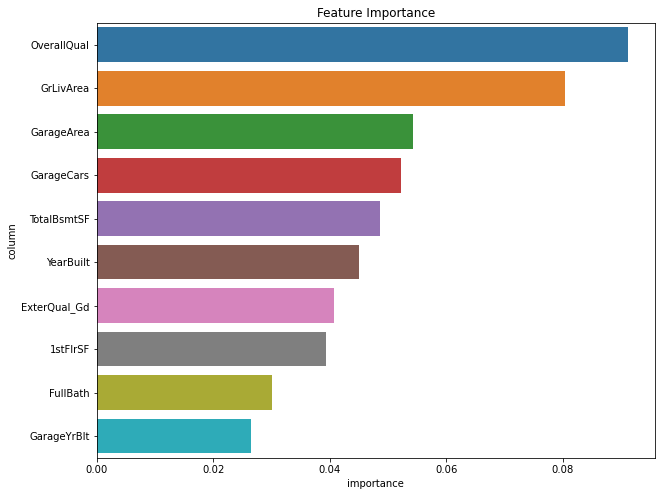

In [396]:
#drawing the plot of importance
plt.figure(figsize = (10,8))
imp = pd.DataFrame({"column" : df_dummy.columns[:-1], "importance" :rf_best.feature_importances_}).sort_values(
by = "importance", ascending = False).iloc[:10, :]
sns.barplot(imp["importance"], imp["column"])
plt.title("Feature Importance")

Finally, one can see that the most infuential factor for house price is its **overall quality rate** together with **living area square feet**. Talking about the rest house properties, garage information is vital as well: its area, capacity in cars and yeat it was built. Together with construction year of the garage, the year the house was built is extremely significant for the final price prediction. **All these factors are directly related with the Sale Price of the house.**

### Prediction Visualization

We can also try to visualize our predictions on the test set.

In [447]:
#separate dataframe for convenience
preds = pd.DataFrame({"preds" : tpot_pred, "actual" : y_test}).sort_values(by = "preds")

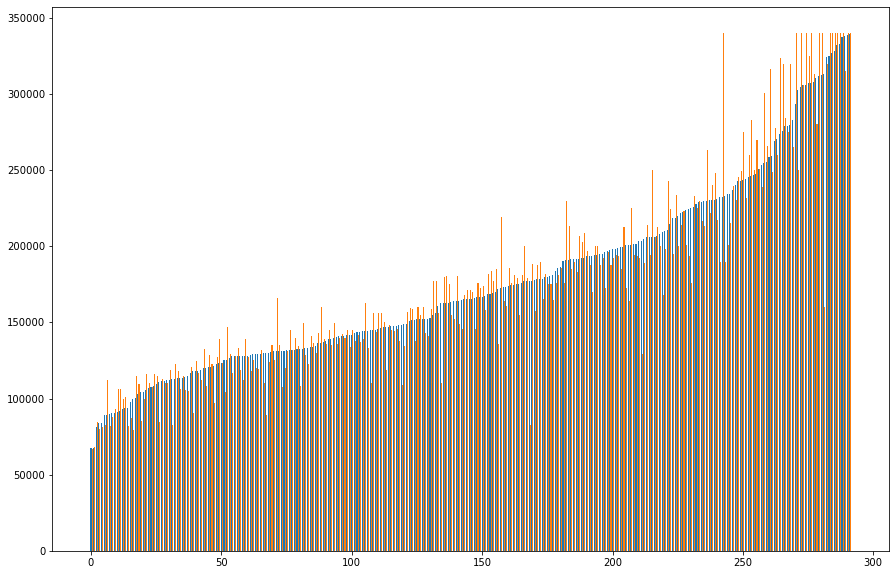

In [449]:
#clustered barplots
fig, ax = plt.subplots(figsize=(15, 10))
x = np.arange(len(tpot_pred))

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.4

# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(x, preds['preds'],
            width=bar_width)
# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(x + bar_width, preds['actual'],
            width=bar_width)

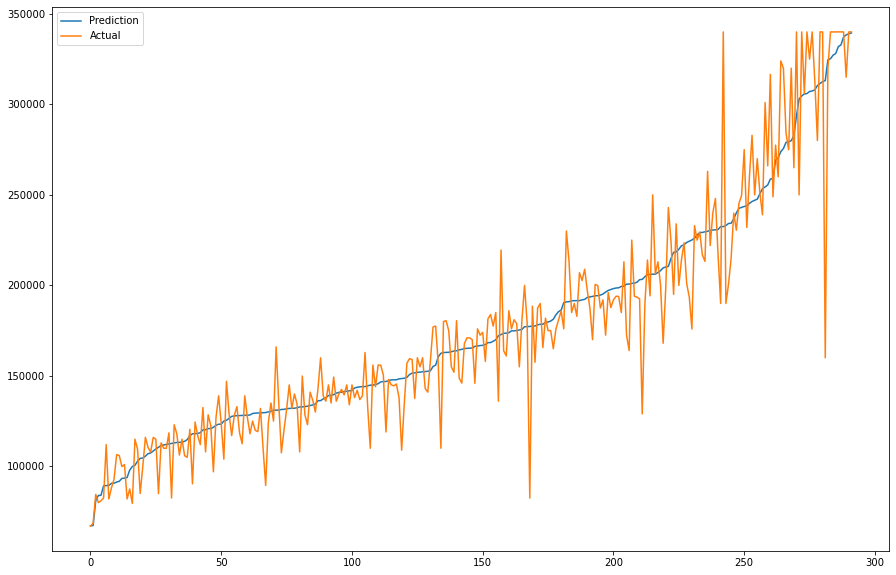

In [456]:
#the same but with lineplots
fig, ax = plt.subplots(figsize=(15, 10))


# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax.plot(x, preds['preds'], label = "Prediction")
b2 = ax.plot(x, preds['actual'], label = "Actual")
ax.legend()

# Conclusion

We have deeply analyzed the dataset about houses, their properties and sale prices. The algorithm was built that can predict the sale price with MAE ~ 14000 and RMSE ~ 21500, or, in other words, in average, with 8.7% over- or underestimation of its actual price. Of course, there are some huge mistakes that model could not fix up, however, overall, it performs well for such large number of features(234).